# 1. **Problem Statement:**


To build a **machine learning–based credit risk classification system** that uses customer demographic information, credit bureau history, and recent financial behavior to classify applicants into **four risk categories (P1, P2, P3, P4)**. The model should reliably differentiate low-risk and high-risk customers, support business-driven credit decisions such as approval, manual review, or rejection, and align with the bank’s risk appetite.


# 2. Exploratory Data Analysis

## Importing libraries and datasets

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_fscore_support
)

from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb

warnings.filterwarnings("ignore")

In [ ]:
# Load datasets

a1 = pd.read_excel(
    "/content/case_study1.xlsx"
)
a2 = pd.read_excel(
    "/content/case_study2.xlsx"
)

df1 = a1.copy()
df2 = a2.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

**Column Descriptions**

* **PROSPECTID** – Unique identifier for each customer (used only for joining datasets).
* **Total_TL** – Total number of credit accounts the customer has ever had.
* **Tot_Closed_TL** – Number of credit accounts that have been closed.
* **Tot_Active_TL** – Number of credit accounts that are currently active.
* **Total_TL_opened_L6M** – Number of credit accounts opened in the last 6 months.
* **Tot_TL_closed_L6M** – Number of credit accounts closed in the last 6 months.
* **pct_tl_open_L6M** – Percentage of total accounts opened in the last 6 months.
* **pct_tl_closed_L6M** – Percentage of total accounts closed in the last 6 months.
* **pct_active_tl** – Percentage of credit accounts that are currently active.
* **pct_closed_tl** – Percentage of credit accounts that are closed.
* **Total_TL_opened_L12M** – Number of credit accounts opened in the last 12 months.
* **Tot_TL_closed_L12M** – Number of credit accounts closed in the last 12 months.
* **pct_tl_open_L12M** – Percentage of total accounts opened in the last 12 months.
* **pct_tl_closed_L12M** – Percentage of total accounts closed in the last 12 months.
* **Tot_Missed_Pmnt** – Total number of missed payments across all credit accounts.
* **Auto_TL** – Number of automobile loan accounts.
* **CC_TL** – Number of credit card accounts.
* **Consumer_TL** – Number of consumer durable loan accounts.
* **Gold_TL** – Number of gold loan accounts.
* **Home_TL** – Number of home loan accounts.
* **PL_TL** – Number of personal loan accounts.
* **Secured_TL** – Number of secured loan accounts (backed by collateral).
* **Unsecured_TL** – Number of unsecured loan accounts (no collateral).
* **Other_TL** – Number of other miscellaneous credit accounts.
* **Age_Oldest_TL** – Age (in months) of the customer’s oldest credit account.
* **Age_Newest_TL** – Age (in months) of the customer’s most recent credit account.



**Column Descriptions**

* **PROSPECTID** – Unique identifier for each customer.
* **time_since_recent_payment** – Number of months since the customer last made a payment.
* **time_since_first_deliquency** – Months since the customer’s first-ever delinquency occurred.
* **time_since_recent_deliquency** – Months since the most recent delinquency.
* **num_times_delinquent** – Total number of times the customer has been delinquent.
* **max_delinquency_level** – Highest delinquency severity ever recorded for the customer.
* **max_recent_level_of_deliq** – Highest delinquency severity in recent history.
* **num_deliq_6mts** – Number of delinquencies in the last 6 months.
* **num_deliq_12mts** – Number of delinquencies in the last 12 months.
* **num_deliq_6_12mts** – Number of delinquencies between 6 and 12 months ago.
* **max_deliq_6mts** – Maximum delinquency level in the last 6 months.
* **max_deliq_12mts** – Maximum delinquency level in the last 12 months.
* **num_times_30p_dpd** – Number of times payments were 30+ days past due.
* **num_times_60p_dpd** – Number of times payments were 60+ days past due.
* **num_std** – Total number of standard (regular) loan accounts.
* **num_std_6mts** – Number of standard accounts in the last 6 months.
* **num_std_12mts** – Number of standard accounts in the last 12 months.
* **num_sub** – Total number of sub-standard loan accounts.
* **num_sub_6mts** – Number of sub-standard accounts in the last 6 months.
* **num_sub_12mts** – Number of sub-standard accounts in the last 12 months.
* **num_dbt** – Total number of doubtful loan accounts.
* **num_dbt_6mts** – Number of doubtful accounts in the last 6 months.
* **num_dbt_12mts** – Number of doubtful accounts in the last 12 months.
* **num_lss** – Total number of loss (written-off) accounts.
* **num_lss_6mts** – Number of loss accounts in the last 6 months.
* **num_lss_12mts** – Number of loss accounts in the last 12 months.
* **recent_level_of_deliq** – Current delinquency severity of the customer.
* **tot_enq** – Total number of credit enquiries made by the customer.
* **CC_enq** – Total number of credit card enquiries.
* **CC_enq_L6m** – Credit card enquiries in the last 6 months.
* **CC_enq_L12m** – Credit card enquiries in the last 12 months.
* **PL_enq** – Total number of personal loan enquiries.
* **PL_enq_L6m** – Personal loan enquiries in the last 6 months.
* **PL_enq_L12m** – Personal loan enquiries in the last 12 months.
* **time_since_recent_enq** – Months since the most recent credit enquiry.
* **enq_L12m** – Total credit enquiries in the last 12 months.
* **enq_L6m** – Total credit enquiries in the last 6 months.
* **enq_L3m** – Total credit enquiries in the last 3 months.
* **MARITALSTATUS** – Marital status of the customer.
* **EDUCATION** – Highest education level of the customer.
* **AGE** – Age of the customer in years.
* **GENDER** – Gender of the customer.
* **NETMONTHLYINCOME** – Customer’s net monthly income.
* **Time_With_Curr_Empr** – Duration (in months) the customer has worked with the current employer.
* **pct_of_active_TLs_ever** – Percentage of credit accounts that have ever been active.
* **pct_opened_TLs_L6m_of_L12m** – Percentage of accounts opened in last 6 months out of last 12 months.
* **pct_currentBal_all_TL** – Percentage of current outstanding balance across all accounts.
* **CC_utilization** – Credit card utilization ratio.
* **CC_Flag** – Indicator showing whether the customer has a credit card.
* **PL_utilization** – Personal loan utilization ratio.
* **PL_Flag** – Indicator showing whether the customer has a personal loan.
* **pct_PL_enq_L6m_of_L12m** – Percentage of personal loan enquiries in last 6 months out of last 12 months.
* **pct_CC_enq_L6m_of_L12m** – Percentage of credit card enquiries in last 6 months out of last 12 months.
* **pct_PL_enq_L6m_of_ever** – Percentage of recent personal loan enquiries out of all historical PL enquiries.
* **pct_CC_enq_L6m_of_ever** – Percentage of recent credit card enquiries out of all historical CC enquiries.
* **max_unsec_exposure_inPct** – Maximum unsecured credit exposure as a percentage of total exposure.
* **HL_Flag** – Indicator showing whether the customer has a home loan.
* **GL_Flag** – Indicator showing whether the customer has a gold loan.
* **last_prod_enq2** – Most recent product type enquired by the customer.
* **first_prod_enq2** – First product type ever enquired by the customer.
* **Credit_Score** – Credit score representing overall creditworthiness.
* **Approved_Flag** – Final credit risk category or approval decision (target variable).


## Merging two DataSets

In [ ]:
# merge them using inner join
df = pd.merge(
    df1,
    df2,
    on='PROSPECTID',
    how='inner'
)

## EDA (Basic things about data)

In [ ]:
# How big is the data?
df.shape

(51336, 87)

In [ ]:
# How does data look like?
df.head()

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  ...  pct_CC_enq_L6m_of_L12m  pct_PL_enq_L6m_of_ever  \
0          0.800  ...                     0.0                     0.0   
1          0.000  ...                     0.0                     0.0   
2          0.000  ...                     0.0                     0.0   
3          0.000  ...                     0.0                     0.0   
4          0.667  ...                     0.0                     0.0   

   pct_CC_enq_L6m_of_ever  max_unsec_exposure_inPct  HL_Flag  GL_Flag  \
0                     0.0                    13.333        1        0   
1                     0.0                     0.860        0        0   
2                     0.0                  5741.667        1        0   
3                     0.0                     9.900        0        0   
4                     0.0                -99999.000        0        0   

   last_prod_enq2  first_prod_enq2  Credit_Score  Approved_Flag  
0              PL               PL           696             P2  
1    ConsumerLoan     ConsumerLoan           685             P2  
2    ConsumerLoan           others           693             P2  
3          others           others           673             P2  
4              AL               AL           753             P1  

[5 rows x 87 columns]

**NOTE:** You can see there are no NULL values in the data sheets, but Actually there are!!!, they are in the form of large values like -99999

In [ ]:
df.replace(-99999, np.nan, inplace=True)

In [ ]:
# data types of columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

**Observe:** Now you can see there are ***very high missing*** values in the dataSet

In [ ]:
# Are there any missing values of dataset?
missing = df.isnull().sum()
missing[missing > 0]

Age_Oldest_TL                      40
Age_Newest_TL                      40
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
max_delinquency_level           35949
max_deliq_6mts                  12890
max_deliq_12mts                 10832
tot_enq                          6321
CC_enq                           6321
CC_enq_L6m                       6321
CC_enq_L12m                      6321
PL_enq                           6321
PL_enq_L6m                       6321
PL_enq_L12m                      6321
time_since_recent_enq            6321
enq_L12m                         6321
enq_L6m                          6321
enq_L3m                          6321
pct_currentBal_all_TL              72
CC_utilization                  47636
PL_utilization                  44435
max_unsec_exposure_inPct        23178
dtype: int64

In [ ]:
# How does data look like mathematically od dataSet?
df.describe()

PROSPECTID      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  51336.000000  51336.000000   51336.000000   51336.000000   
mean   25668.500000      4.858598       2.770415       2.088184   
std    14819.571046      7.177116       5.941680       2.290774   
min        1.000000      1.000000       0.000000       0.000000   
25%    12834.750000      1.000000       0.000000       1.000000   
50%    25668.500000      2.000000       1.000000       1.000000   
75%    38502.250000      5.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         51336.000000       51336.000000     51336.000000   
mean              0.736754           0.428919         0.184574   
std               1.296717           0.989972         0.297414   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.000000         0.000000   
50%               0.000000           0.000000         0.000000   
75%               1.000000           1.000000         0.308000   
max              27.000000          19.000000         1.000000   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  ...  PL_utilization  \
count       51336.000000   51336.000000   51336.000000  ...     6901.000000   
mean            0.089095       0.577542       0.422458  ...        0.751838   
std             0.205635       0.379867       0.379867  ...        0.253933   
min             0.000000       0.000000       0.000000  ...        0.000000   
25%             0.000000       0.250000       0.000000  ...        0.641000   
50%             0.000000       0.556000       0.444000  ...        0.835000   
75%             0.053000       1.000000       0.750000  ...        0.944000   
max             1.000000       1.000000       1.000000  ...        1.708000   

            PL_Flag  pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  \
count  51336.000000            51336.000000            51336.000000   
mean       0.167874                0.190414                0.065182   
std        0.373758                0.376218                0.235706   
min        0.000000                0.000000                0.000000   
25%        0.000000                0.000000                0.000000   
50%        0.000000                0.000000                0.000000   
75%        0.000000                0.000000                0.000000   
max        1.000000                1.000000                1.000000   

       pct_PL_enq_L6m_of_ever  pct_CC_enq_L6m_of_ever  \
count            51336.000000            51336.000000   
mean                 0.170492                0.056302   
std                  0.350209                0.213506   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       max_unsec_exposure_inPct       HL_Flag       GL_Flag  Credit_Score  
count              28158.000000  51336.000000  51336.000000  51336.000000  
mean                  38.664235      0.271116      0.052887    679.859222  
std                 1498.955157      0.444540      0.223810     20.502764  
min                    0.000000      0.000000      0.000000    469.000000  
25%                    0.775000      0.000000      0.000000    669.000000  
50%                    1.820000      0.000000      0.000000    680.000000  
75%                    5.283000      1.000000      0.000000    691.000000  
max               173800.000000      1.000000      1.000000    811.000000  

[8 rows x 81 columns]

In [ ]:
# How is correlation btw cols of dataset?
df.corr(numeric_only=True)

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  \
PROSPECTID                  1.000000 -0.001858       0.000154      -0.006221   
Total_TL                   -0.001858  1.000000       0.956367       0.652481   
Tot_Closed_TL               0.000154  0.956367       1.000000       0.402606   
Tot_Active_TL              -0.006221  0.652481       0.402606       1.000000   
Total_TL_opened_L6M        -0.002460  0.408441       0.236070       0.667361   
...                              ...       ...            ...            ...   
pct_CC_enq_L6m_of_ever      0.006415  0.073229       0.029816       0.152096   
max_unsec_exposure_inPct    0.000676  0.010436       0.004150       0.021422   
HL_Flag                     0.003321  0.409390       0.417535       0.199662   
GL_Flag                    -0.000242  0.098204       0.068004       0.131294   
Credit_Score               -0.008003  0.202859       0.206652       0.099566   

                          Total_TL_opened_L6M  Tot_TL_closed_L6M  \
PROSPECTID                          -0.002460           0.002525   
Total_TL                             0.408441           0.453666   
Tot_Closed_TL                        0.236070           0.388155   
Tot_Active_TL                        0.667361           0.414587   
Total_TL_opened_L6M                  1.000000           0.505473   
...                                       ...                ...   
pct_CC_enq_L6m_of_ever               0.213443           0.109512   
max_unsec_exposure_inPct             0.005307           0.010087   
HL_Flag                              0.120232           0.140065   
GL_Flag                              0.009713           0.014198   
Credit_Score                        -0.112826           0.031527   

                          pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
PROSPECTID                      -0.001665           0.005634      -0.004829   
Total_TL                        -0.074973          -0.002687      -0.263300   
Tot_Closed_TL                   -0.140151           0.020013      -0.383012   
Tot_Active_TL                    0.128623          -0.060328       0.168503   
Total_TL_opened_L6M              0.529940           0.087148       0.096540   
...                                   ...                ...            ...   
pct_CC_enq_L6m_of_ever           0.146982           0.028052       0.044863   
max_unsec_exposure_inPct        -0.006811           0.006564      -0.005868   
HL_Flag                         -0.099421          -0.038575      -0.343173   
GL_Flag                         -0.053952          -0.043672       0.014589   
Credit_Score                    -0.255157          -0.065349      -0.182756   

                          pct_closed_tl  ...  PL_utilization   PL_Flag  \
PROSPECTID                     0.004829  ...        0.008739 -0.001352   
Total_TL                       0.263300  ...       -0.061027  0.225026   
Tot_Closed_TL                  0.383012  ...       -0.086039  0.153221   
Tot_Active_TL                 -0.168503  ...        0.021623  0.307603   
Total_TL_opened_L6M           -0.096540  ...        0.212937  0.244400   
...                                 ...  ...             ...       ...   
pct_CC_enq_L6m_of_ever        -0.044863  ...        0.086453  0.126378   
max_unsec_exposure_inPct       0.005868  ...        0.006252  0.022279   
HL_Flag                        0.343173  ...       -0.047628  0.006393   
GL_Flag                       -0.014589  ...       -0.055764  0.076200   
Credit_Score                   0.182756  ...       -0.229592  0.037956   

                          pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  \
PROSPECTID                              0.003666                0.006387   
Total_TL                                0.071978                0.099260   
Tot_Closed_TL                           0.020372                0.049458   
Tot_Active_TL                           0.172670                0.182706   
Total_TL_opened_L6M           

## Univariate analysis

In [ ]:
# seperate Numerical and caegerical cols
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
num_cols

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

In [ ]:
# summary statistics
df[num_cols].describe()

PROSPECTID      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  51336.000000  51336.000000   51336.000000   51336.000000   
mean   25668.500000      4.858598       2.770415       2.088184   
std    14819.571046      7.177116       5.941680       2.290774   
min        1.000000      1.000000       0.000000       0.000000   
25%    12834.750000      1.000000       0.000000       1.000000   
50%    25668.500000      2.000000       1.000000       1.000000   
75%    38502.250000      5.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         51336.000000       51336.000000     51336.000000   
mean              0.736754           0.428919         0.184574   
std               1.296717           0.989972         0.297414   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.000000         0.000000   
50%               0.000000           0.000000         0.000000   
75%               1.000000           1.000000         0.308000   
max              27.000000          19.000000         1.000000   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  ...  PL_utilization  \
count       51336.000000   51336.000000   51336.000000  ...     6901.000000   
mean            0.089095       0.577542       0.422458  ...        0.751838   
std             0.205635       0.379867       0.379867  ...        0.253933   
min             0.000000       0.000000       0.000000  ...        0.000000   
25%             0.000000       0.250000       0.000000  ...        0.641000   
50%             0.000000       0.556000       0.444000  ...        0.835000   
75%             0.053000       1.000000       0.750000  ...        0.944000   
max             1.000000       1.000000       1.000000  ...        1.708000   

            PL_Flag  pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  \
count  51336.000000            51336.000000            51336.000000   
mean       0.167874                0.190414                0.065182   
std        0.373758                0.376218                0.235706   
min        0.000000                0.000000                0.000000   
25%        0.000000                0.000000                0.000000   
50%        0.000000                0.000000                0.000000   
75%        0.000000                0.000000                0.000000   
max        1.000000                1.000000                1.000000   

       pct_PL_enq_L6m_of_ever  pct_CC_enq_L6m_of_ever  \
count            51336.000000            51336.000000   
mean                 0.170492                0.056302   
std                  0.350209                0.213506   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       max_unsec_exposure_inPct       HL_Flag       GL_Flag  Credit_Score  
count              28158.000000  51336.000000  51336.000000  51336.000000  
mean                  38.664235      0.271116      0.052887    679.859222  
std                 1498.955157      0.444540      0.223810     20.502764  
min                    0.000000      0.000000      0.000000    469.000000  
25%                    0.775000      0.000000      0.000000    669.000000  
50%                    1.820000      0.000000      0.000000    680.000000  
75%                    5.283000      1.000000      0.000000    691.000000  
max               173800.000000      1.000000      1.000000    811.000000  

[8 rows x 81 columns]

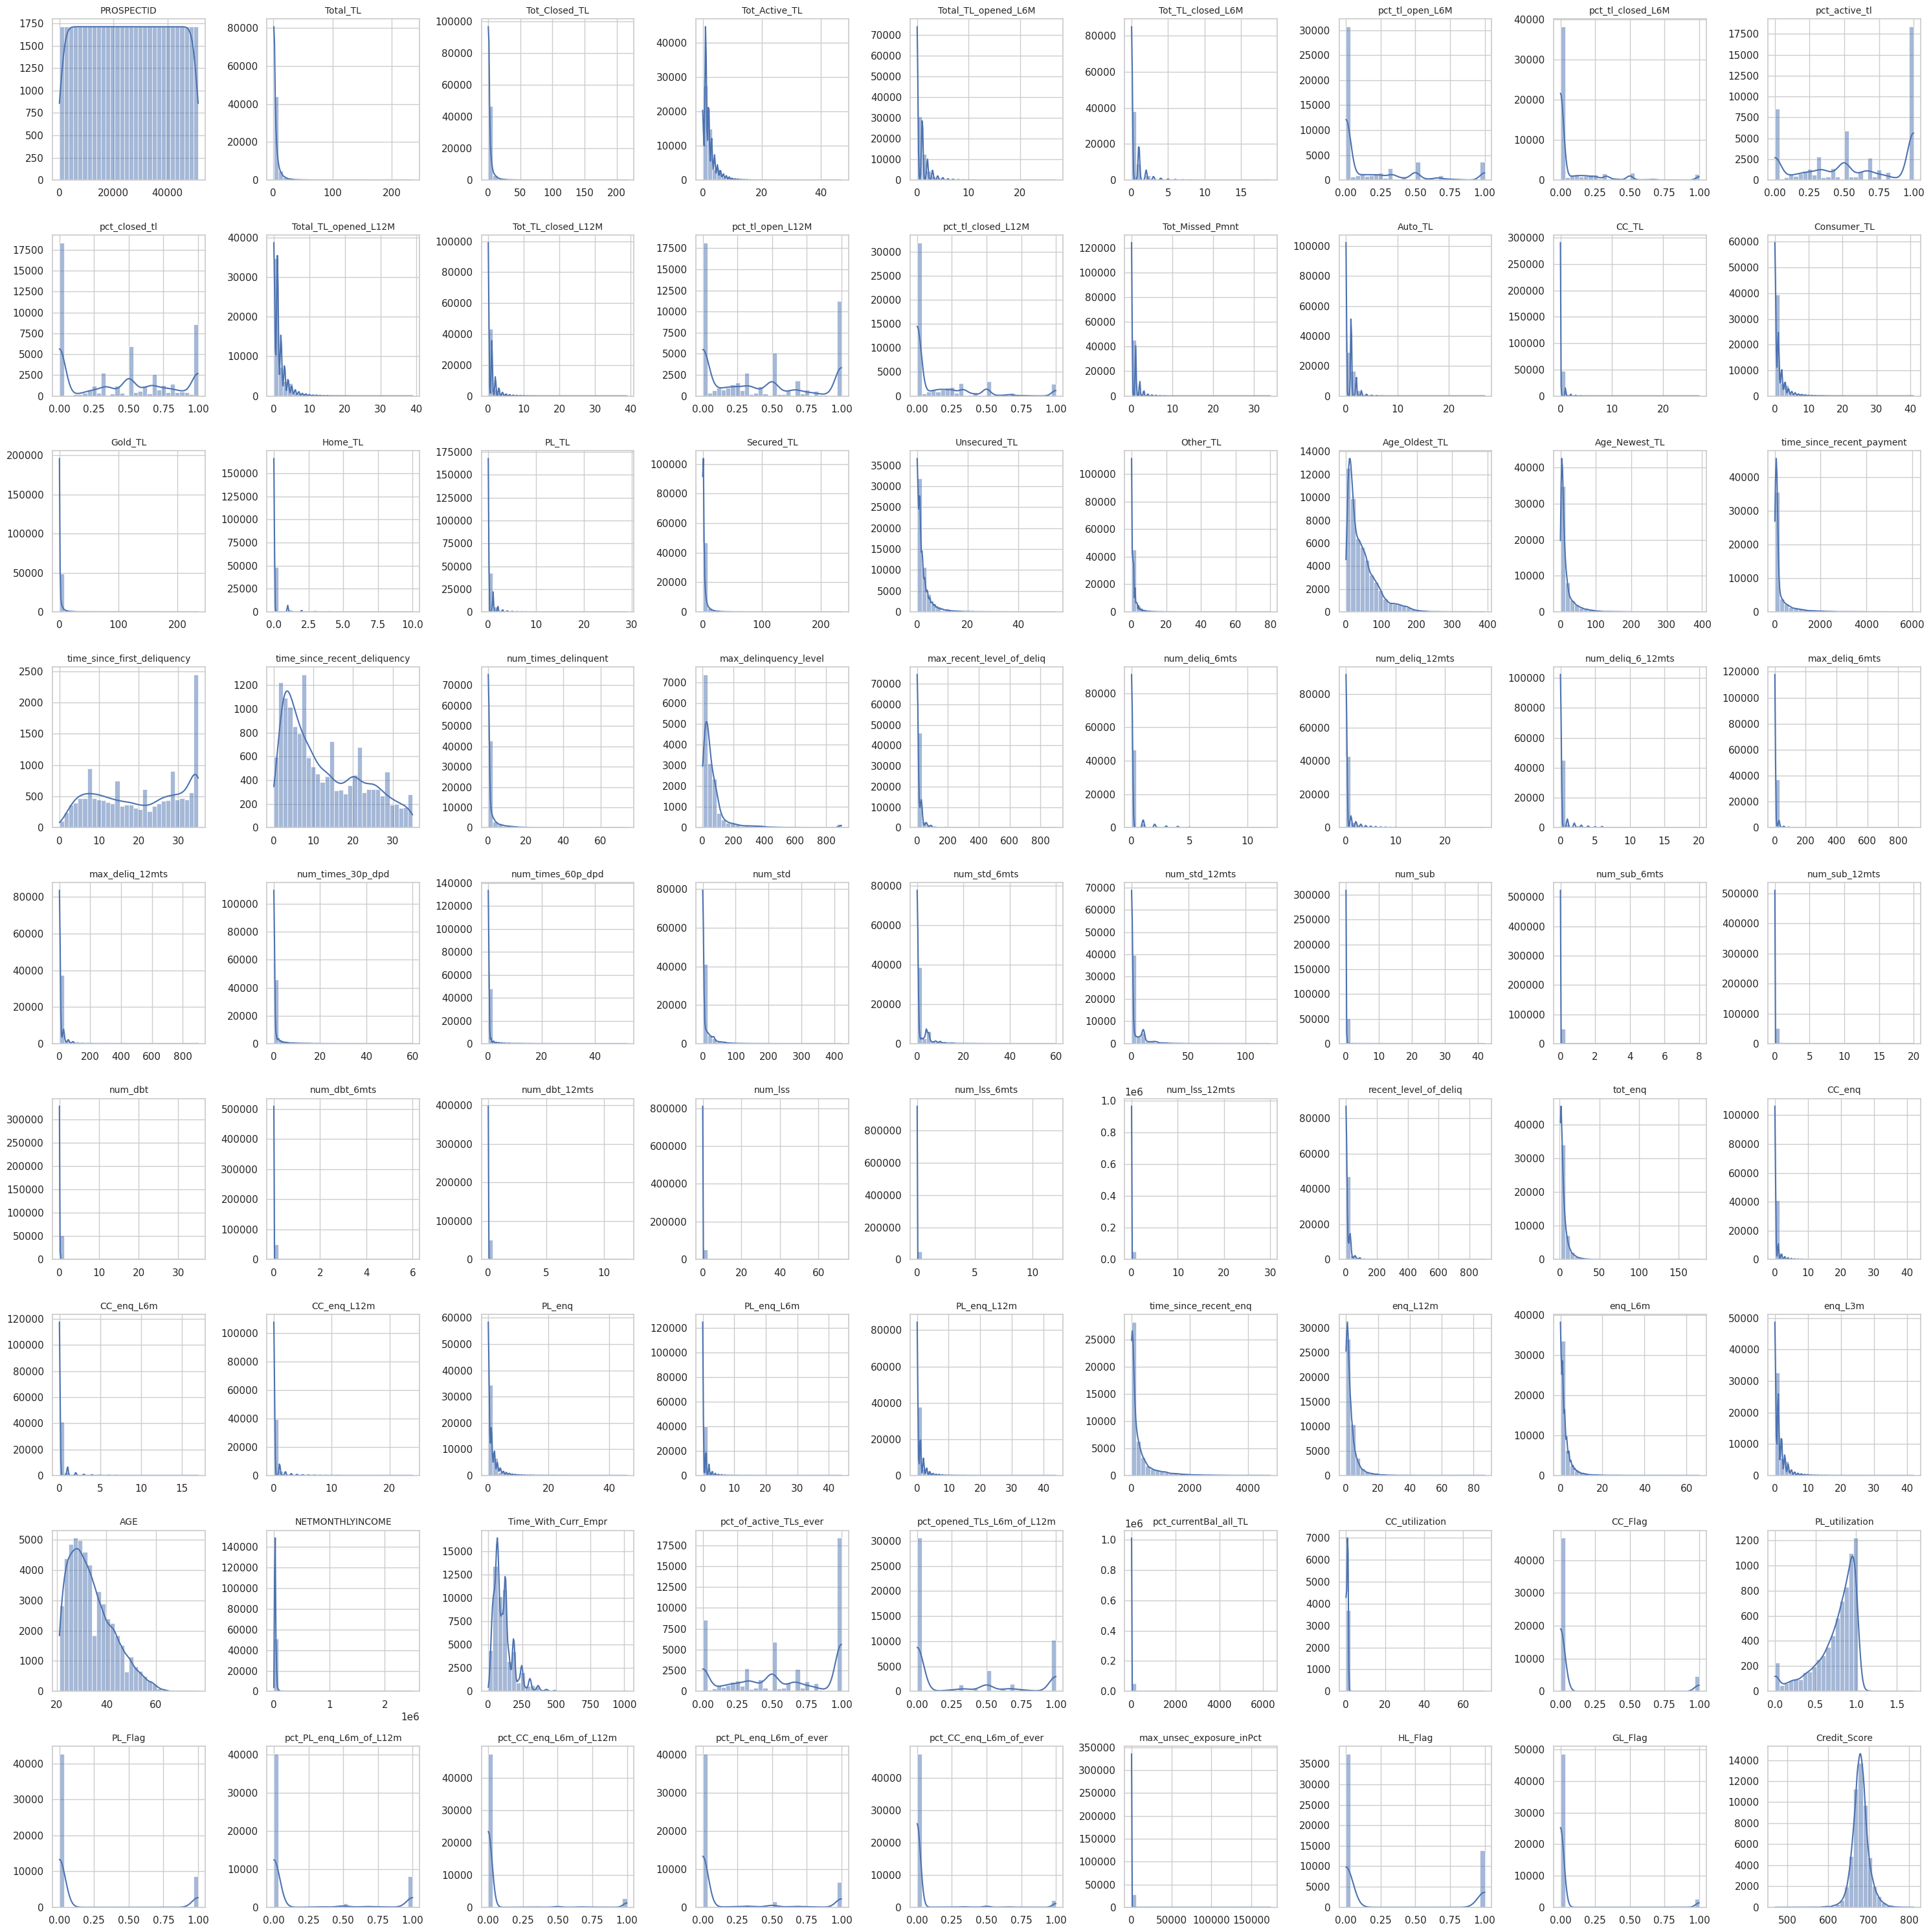

In [ ]:
# Univariate analysis for Numerical cols of sheet1
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_features = len(num_cols)
rows = cols = 9

fig, axes = plt.subplots(rows, cols, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide empty subplots (if any)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


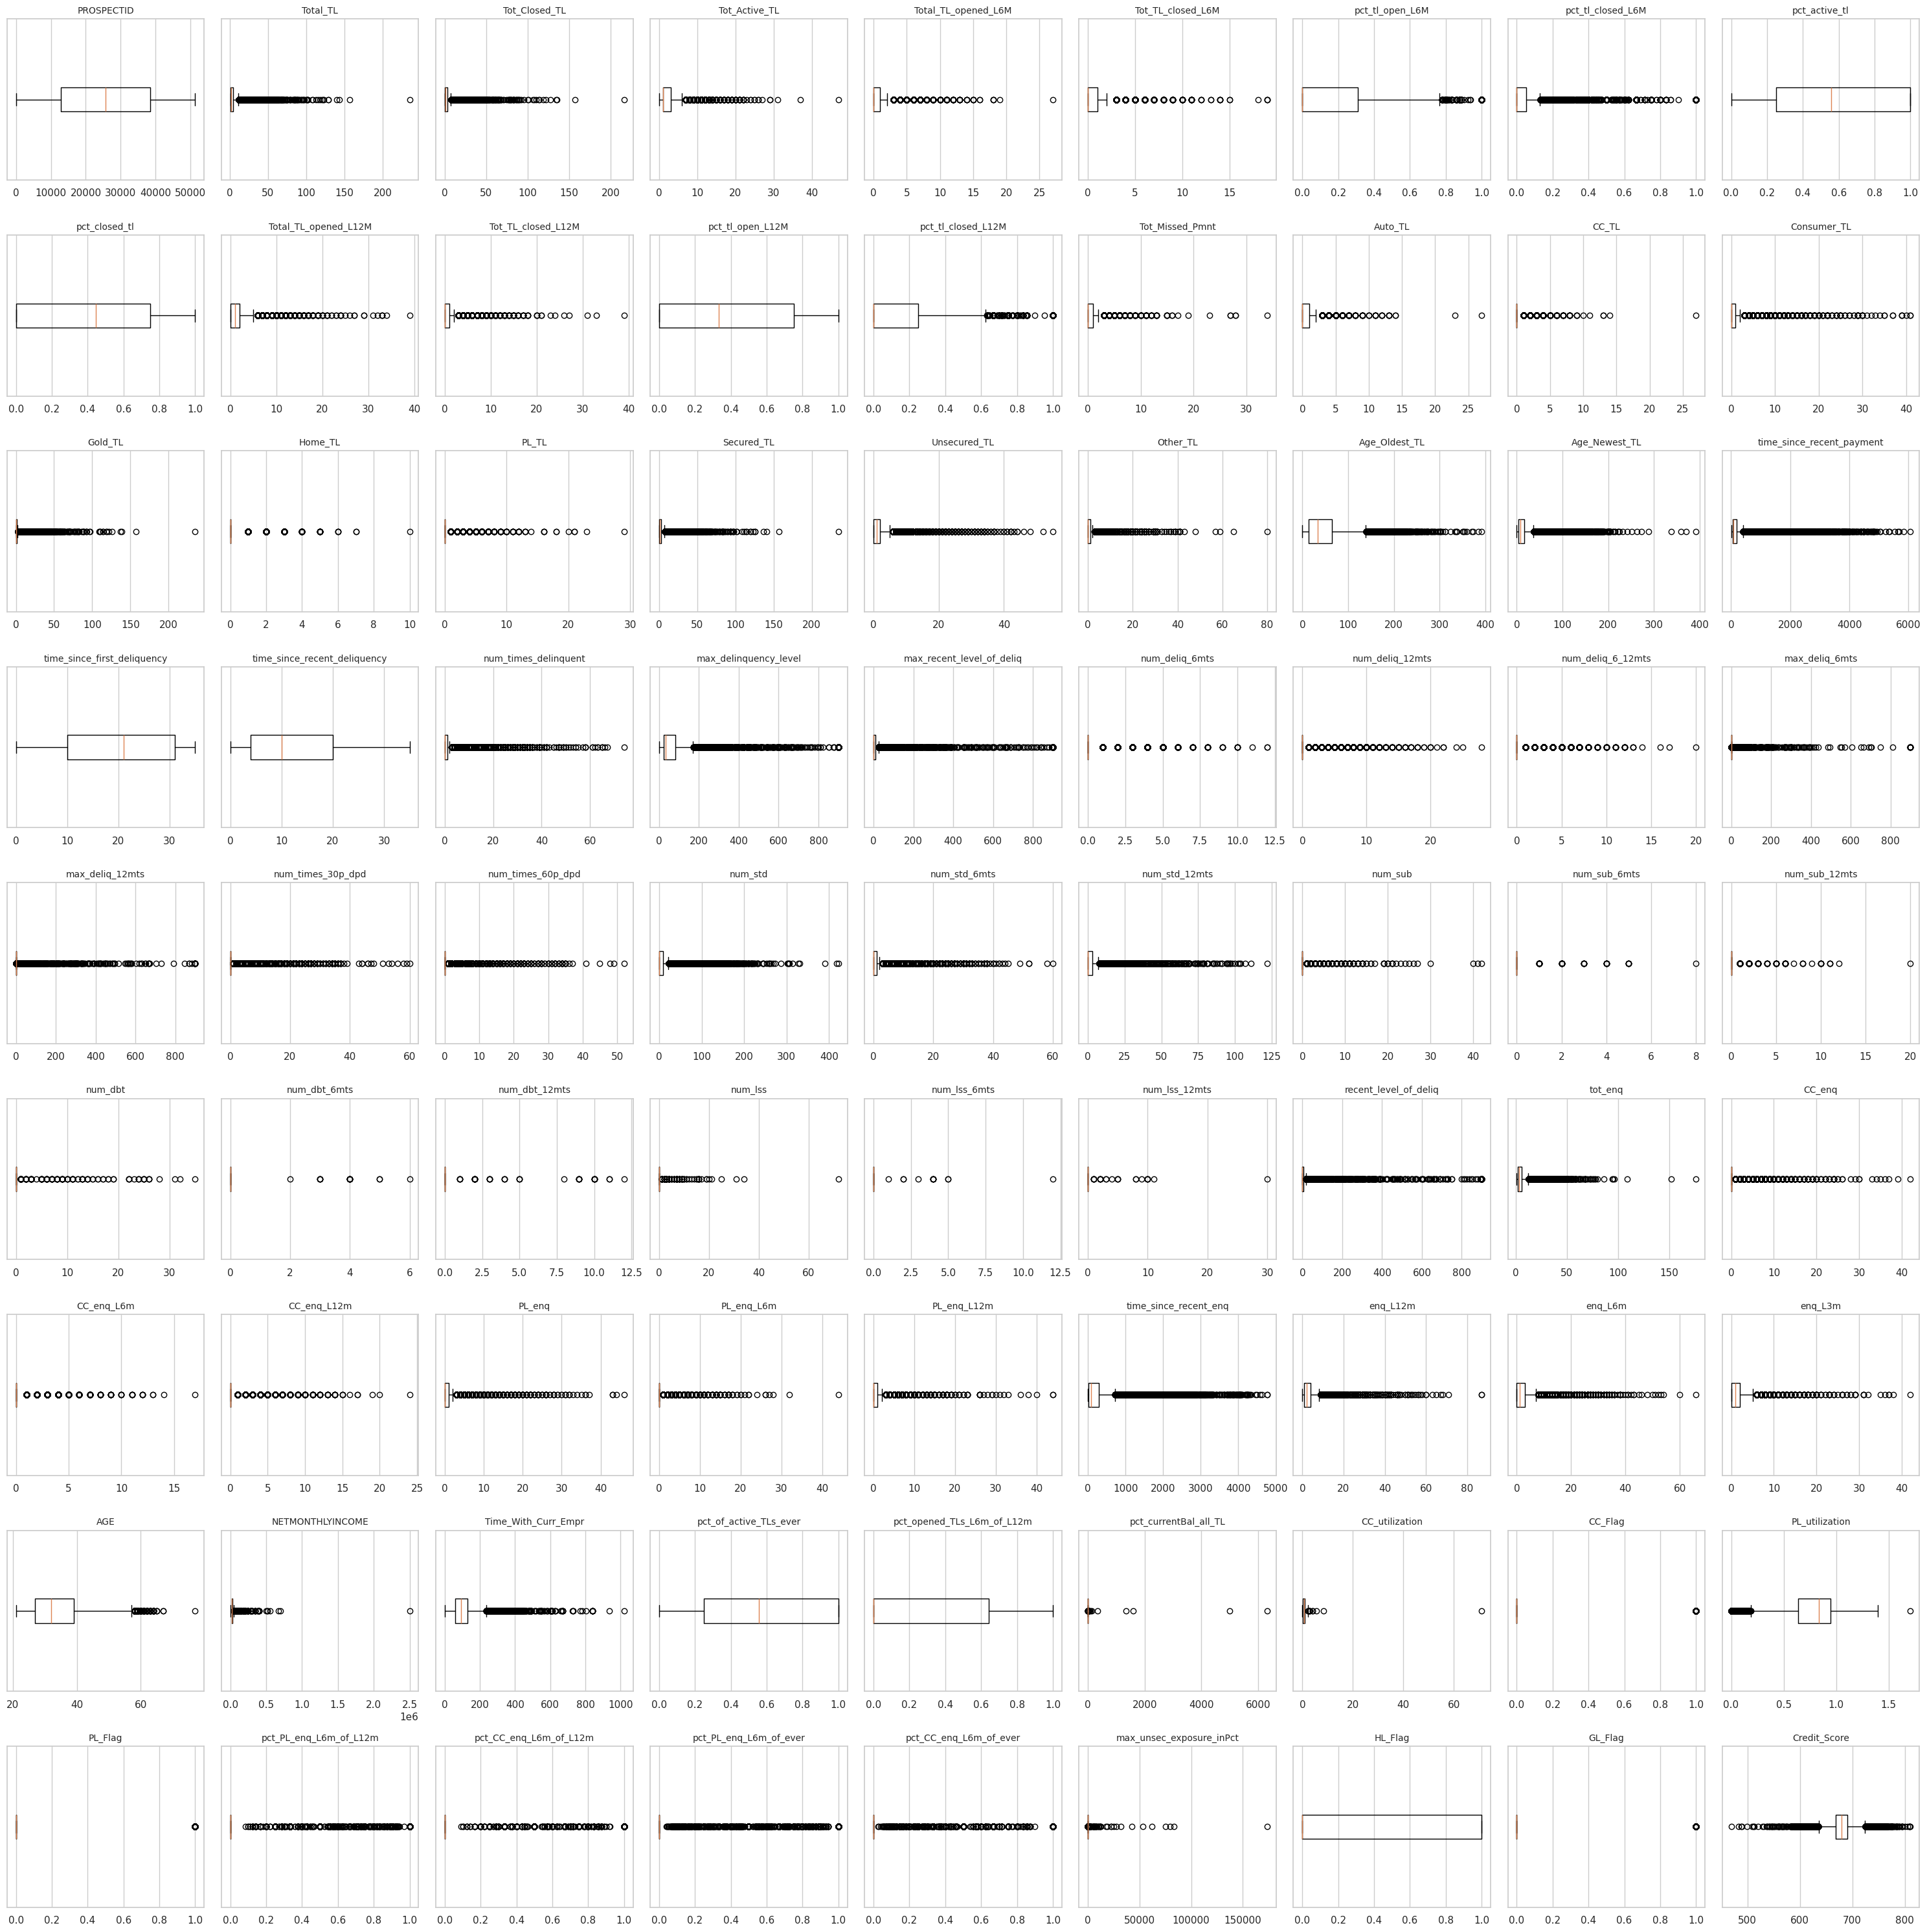

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_features = len(num_cols)
rows = cols = 9

fig, axes = plt.subplots(rows, cols, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(
        df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_yticks([])

# Remove empty subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Bivariate Analysis

**Numerical-Numerical Plots**

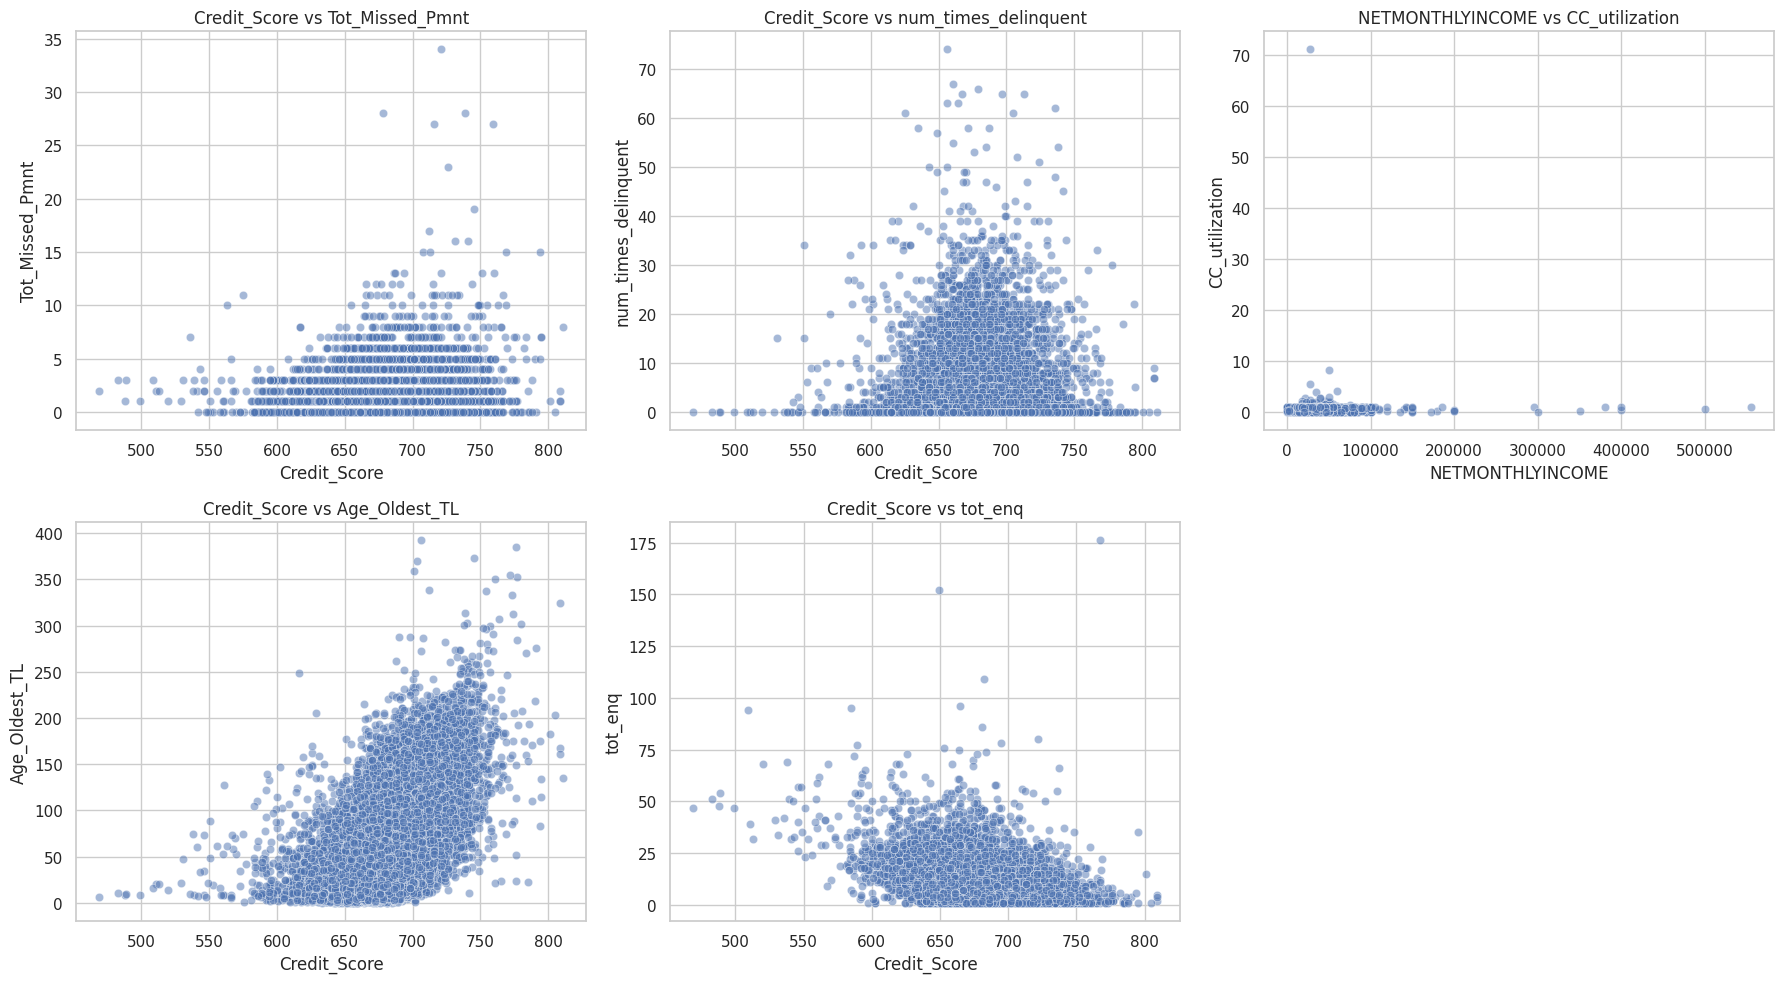

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

important_pairs = [
    ('Credit_Score', 'Tot_Missed_Pmnt'),
    ('Credit_Score', 'num_times_delinquent'),
    ('NETMONTHLYINCOME', 'CC_utilization'),
    ('Credit_Score','Age_Oldest_TL'),
    ('Credit_Score' , 'tot_enq')
]

n_plots = len(important_pairs)
cols = 3
rows = math.ceil(n_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(important_pairs):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



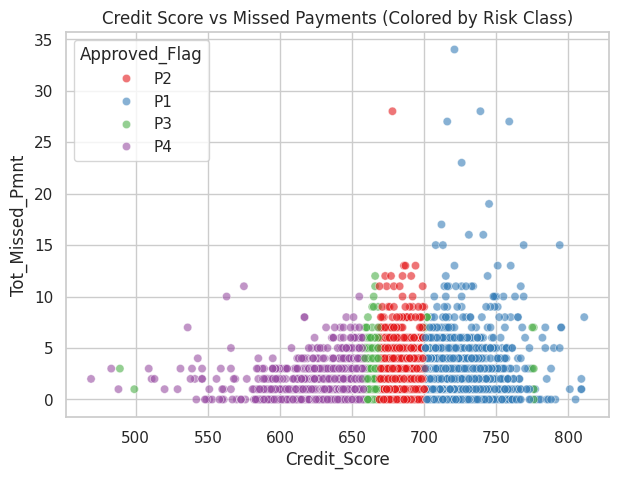

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x='Credit_Score',
    y='Tot_Missed_Pmnt',
    hue='Approved_Flag',
    palette='Set1',
    alpha=0.6
)
plt.title("Credit Score vs Missed Payments (Colored by Risk Class)")
plt.show()


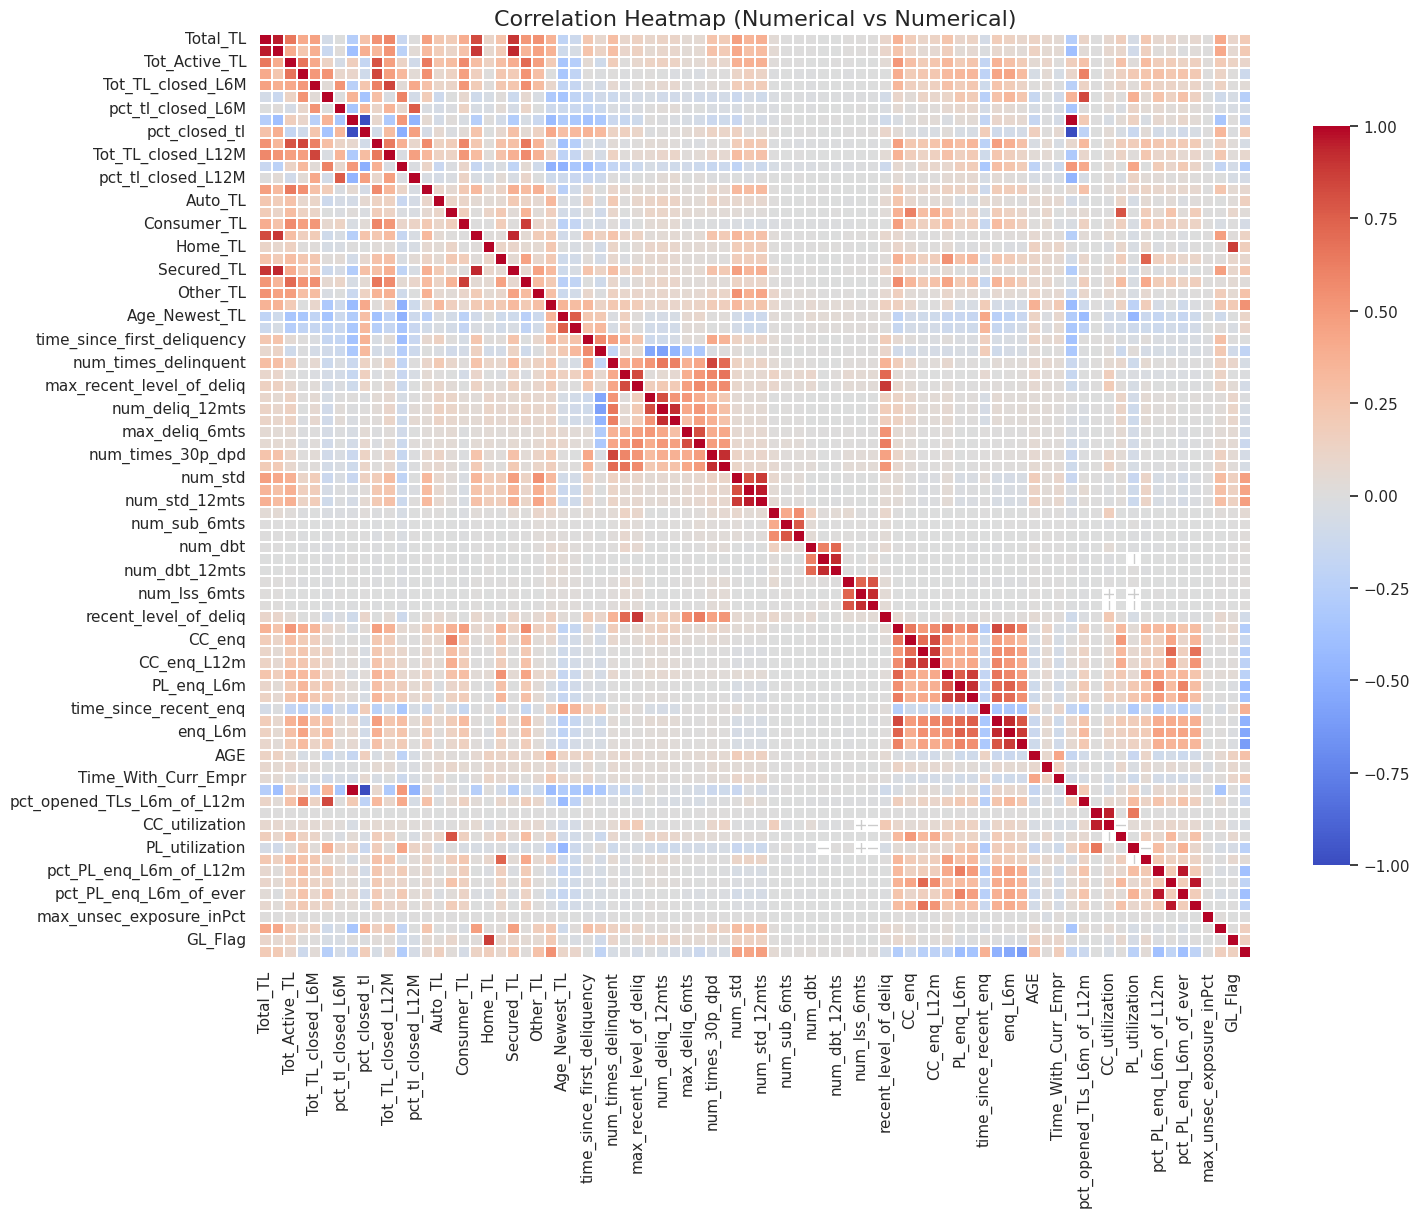

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns (exclude ID & target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(['PROSPECTID', 'Approved_Flag'], errors='ignore')

plt.figure(figsize=(16, 12))
corr = df[num_cols].corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap (Numerical vs Numerical)", fontsize=16)
plt.show()


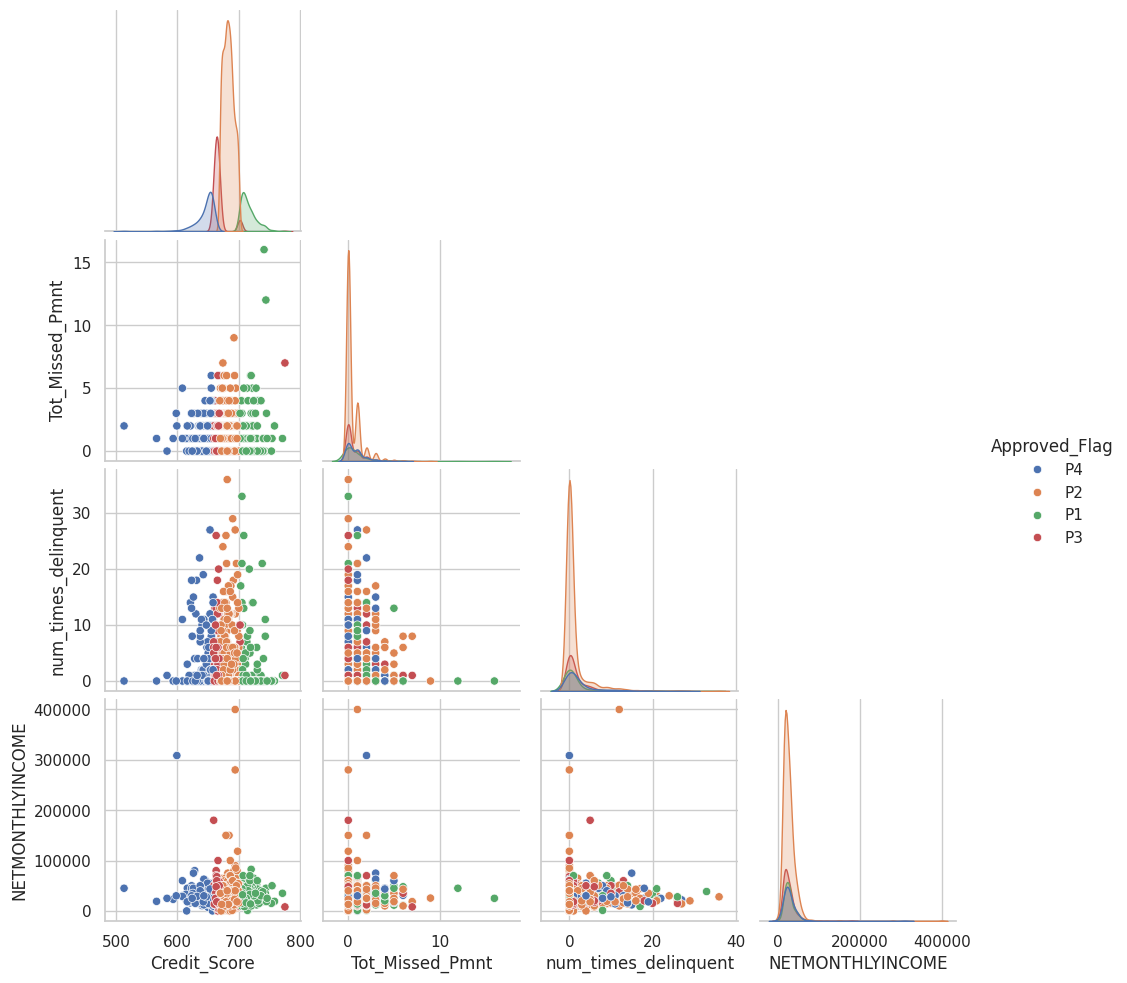

In [ ]:
sample_df = df[
    ['Credit_Score', 'Tot_Missed_Pmnt', 'num_times_delinquent',
     'NETMONTHLYINCOME', 'Approved_Flag']
].sample(2000, random_state=42)

sns.pairplot(sample_df, hue='Approved_Flag', corner=True)
plt.show()


**Numerical - Categorical**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

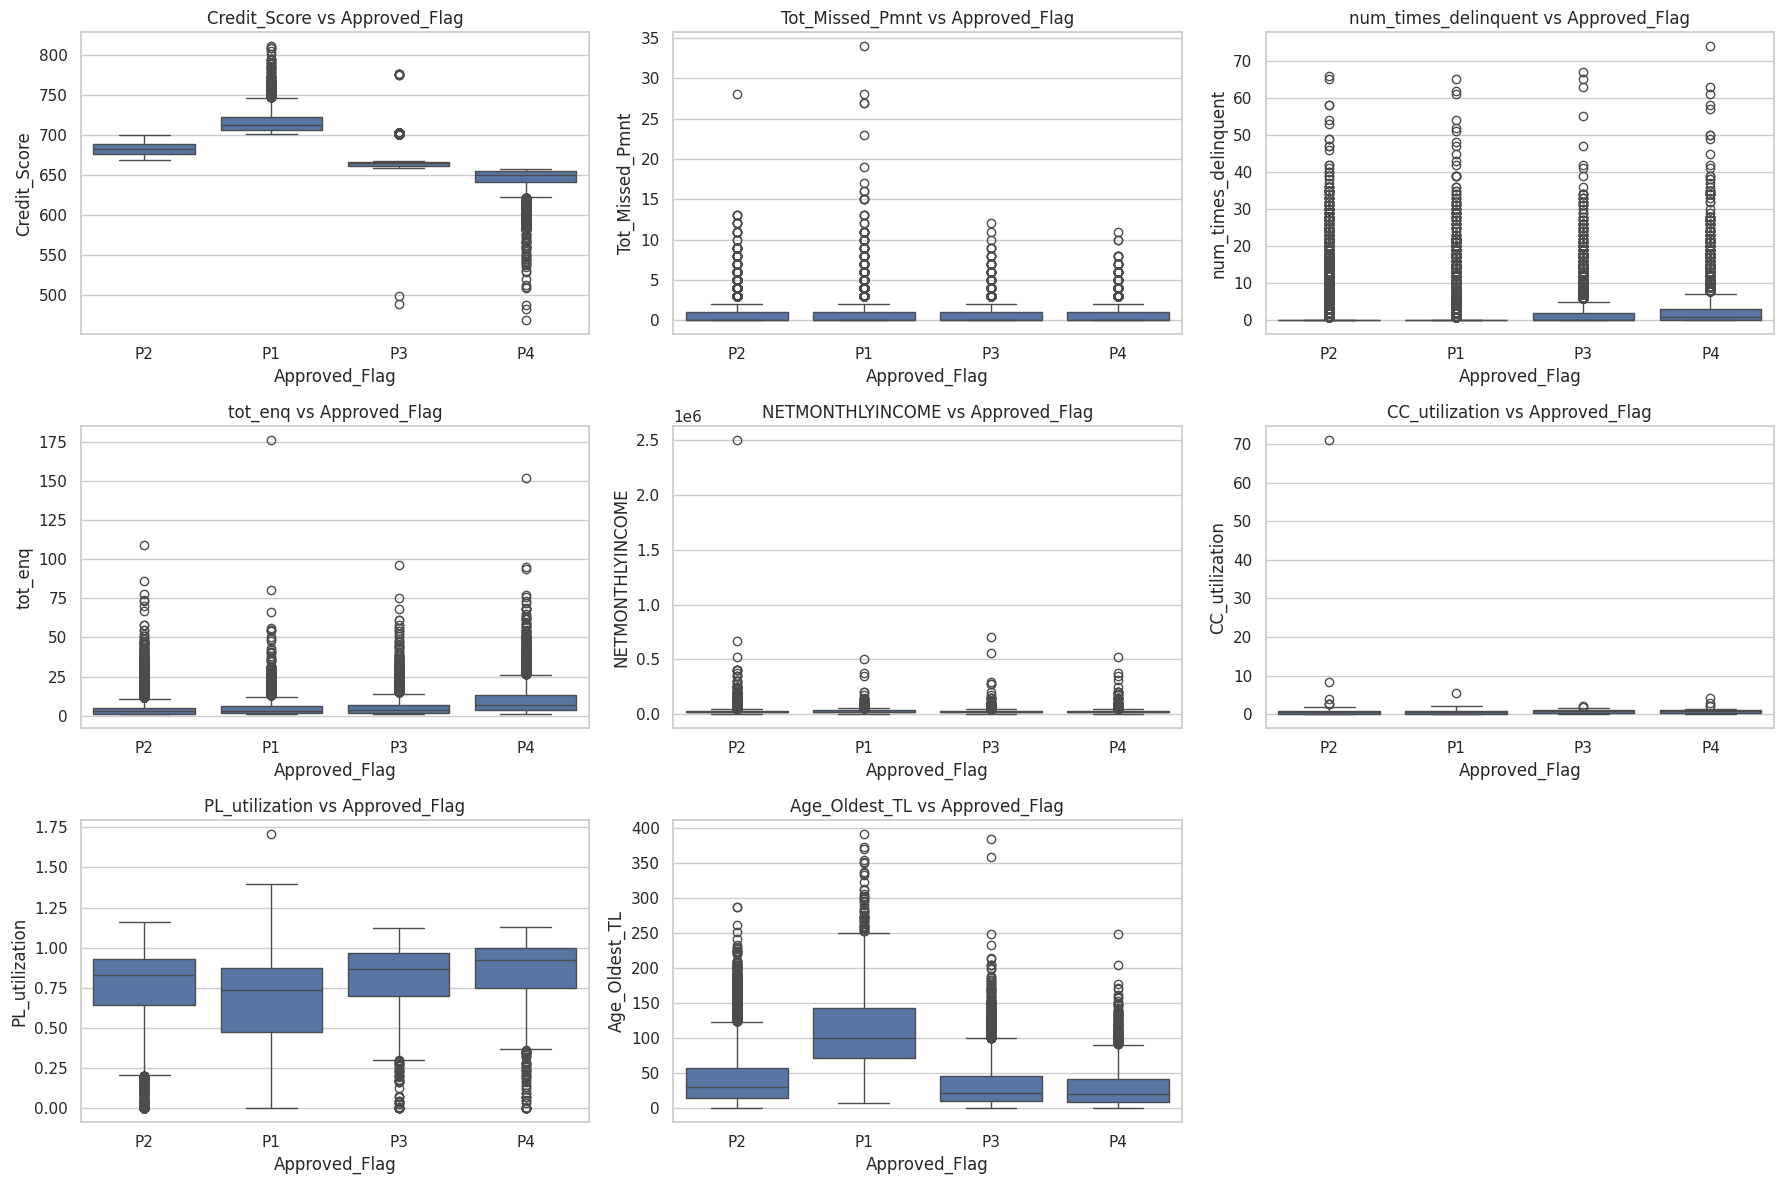

In [ ]:
num_cols = [
    'Credit_Score',
    'Tot_Missed_Pmnt',
    'num_times_delinquent',
    'tot_enq',
    'NETMONTHLYINCOME',
    'CC_utilization',
    'PL_utilization',
    'Age_Oldest_TL'
]

n_plots = len(num_cols)
cols = 3
rows = math.ceil(n_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=df,
        x='Approved_Flag',
        y=col,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Approved_Flag")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


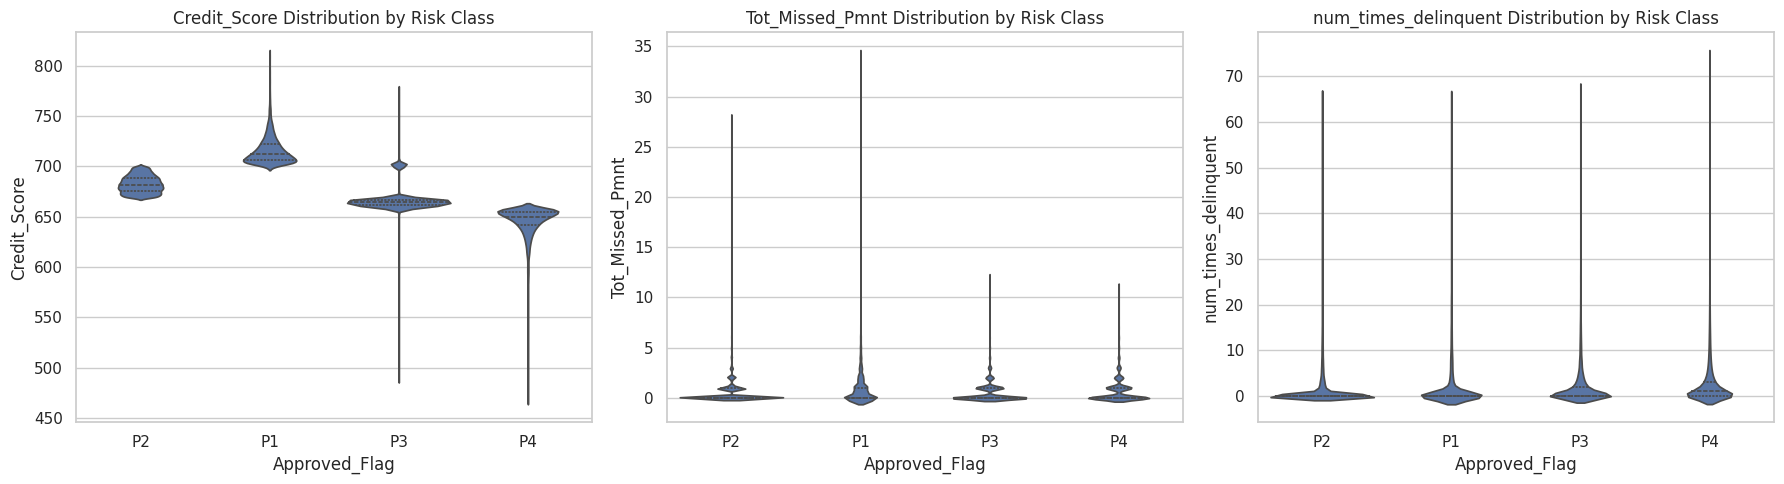

In [ ]:
cols = ['Credit_Score', 'Tot_Missed_Pmnt', 'num_times_delinquent']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.violinplot(
        data=df,
        x='Approved_Flag',
        y=col,
        inner='quartile',
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Risk Class")

plt.tight_layout()
plt.show()


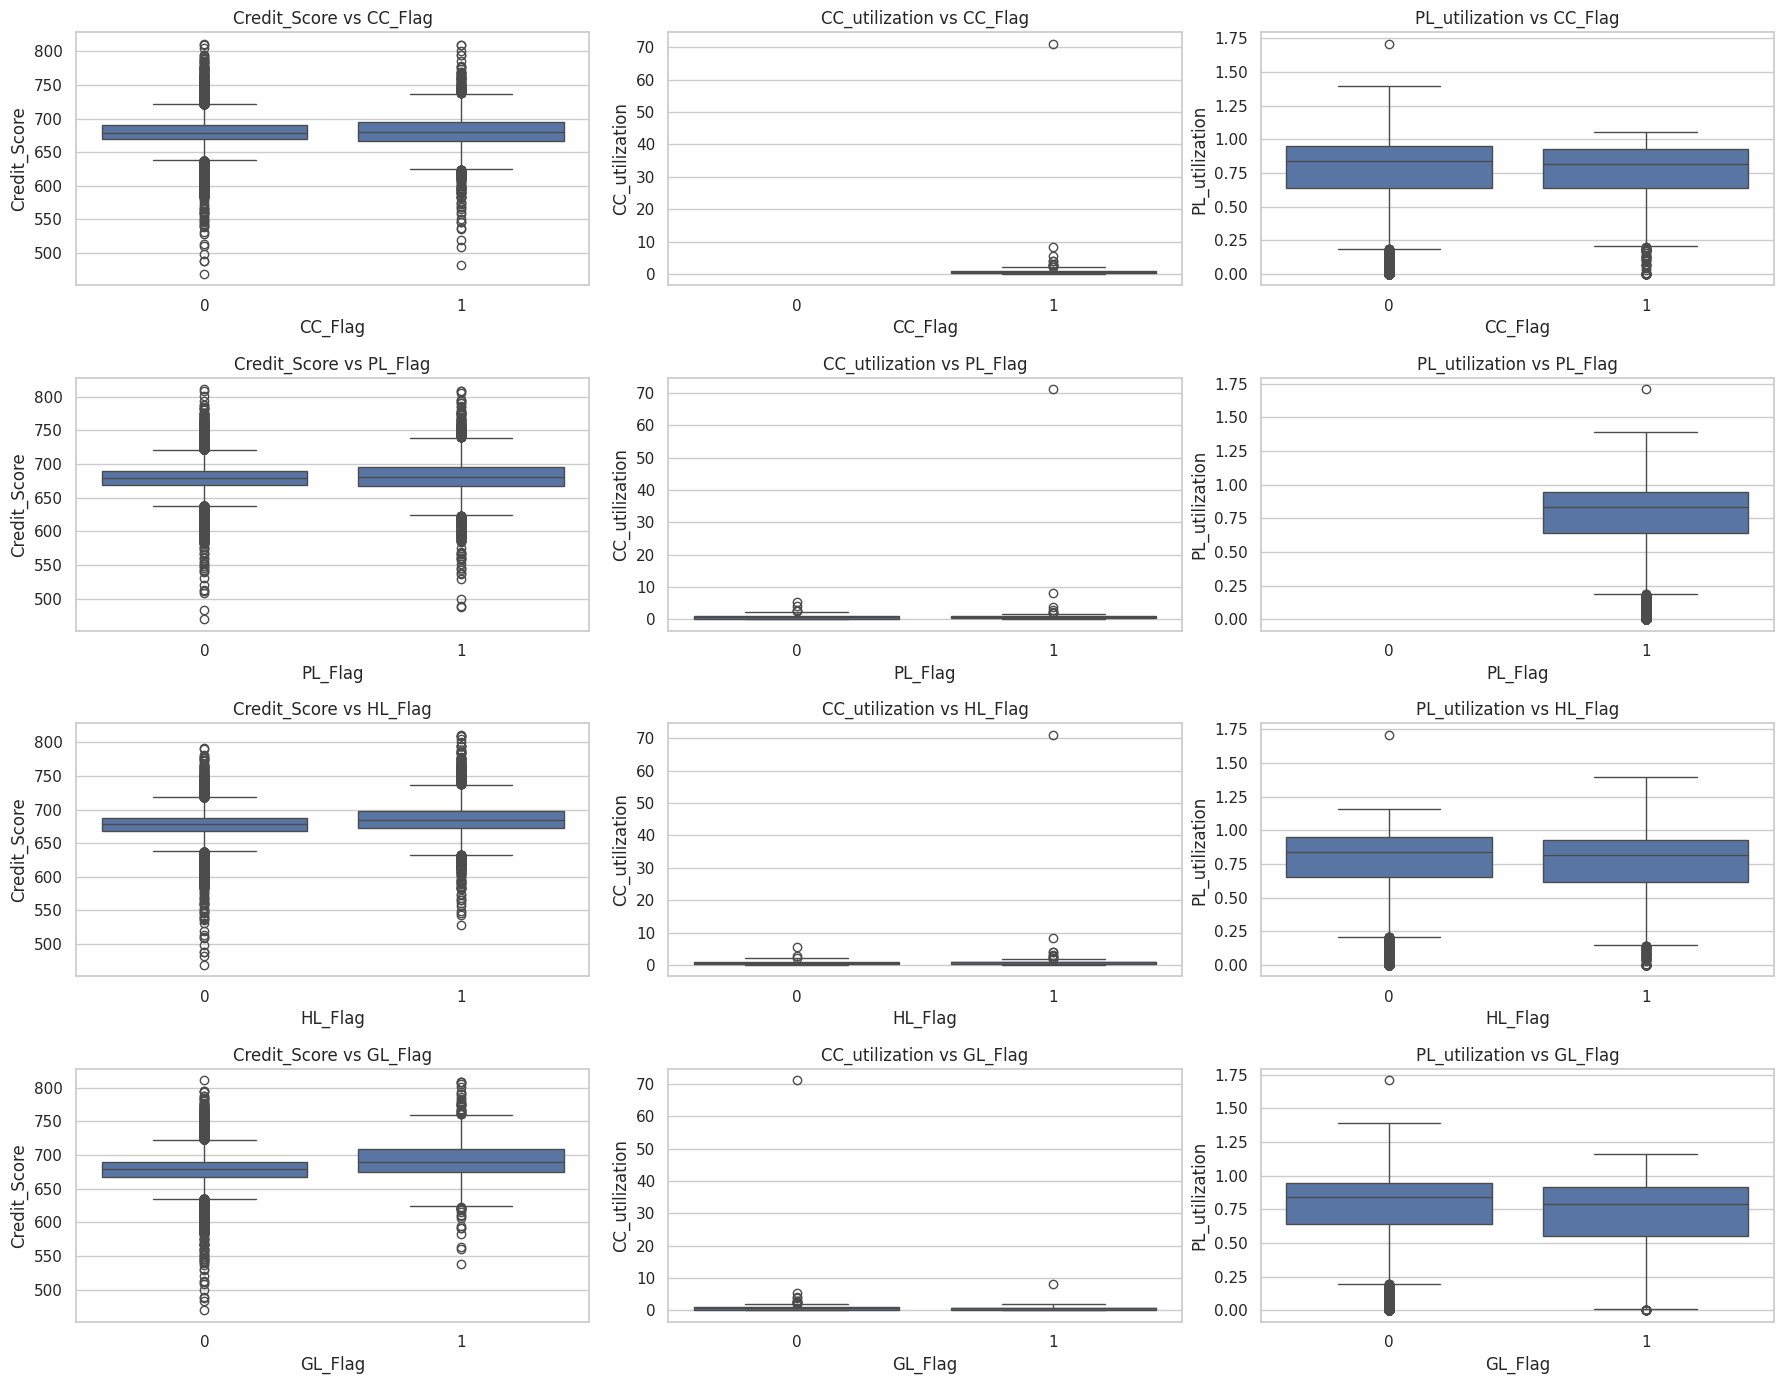

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

binary_flags = ['CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag']
num_cols = ['Credit_Score', 'CC_utilization', 'PL_utilization']

rows = len(binary_flags)
cols = len(num_cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 14))

for i, flag in enumerate(binary_flags):
    for j, col in enumerate(num_cols):
        sns.boxplot(
            data=df,
            x=flag,
            y=col,
            ax=axes[i, j]
        )
        axes[i, j].set_title(f"{col} vs {flag}")

plt.tight_layout()
plt.show()

**Categeorical - categeorical**

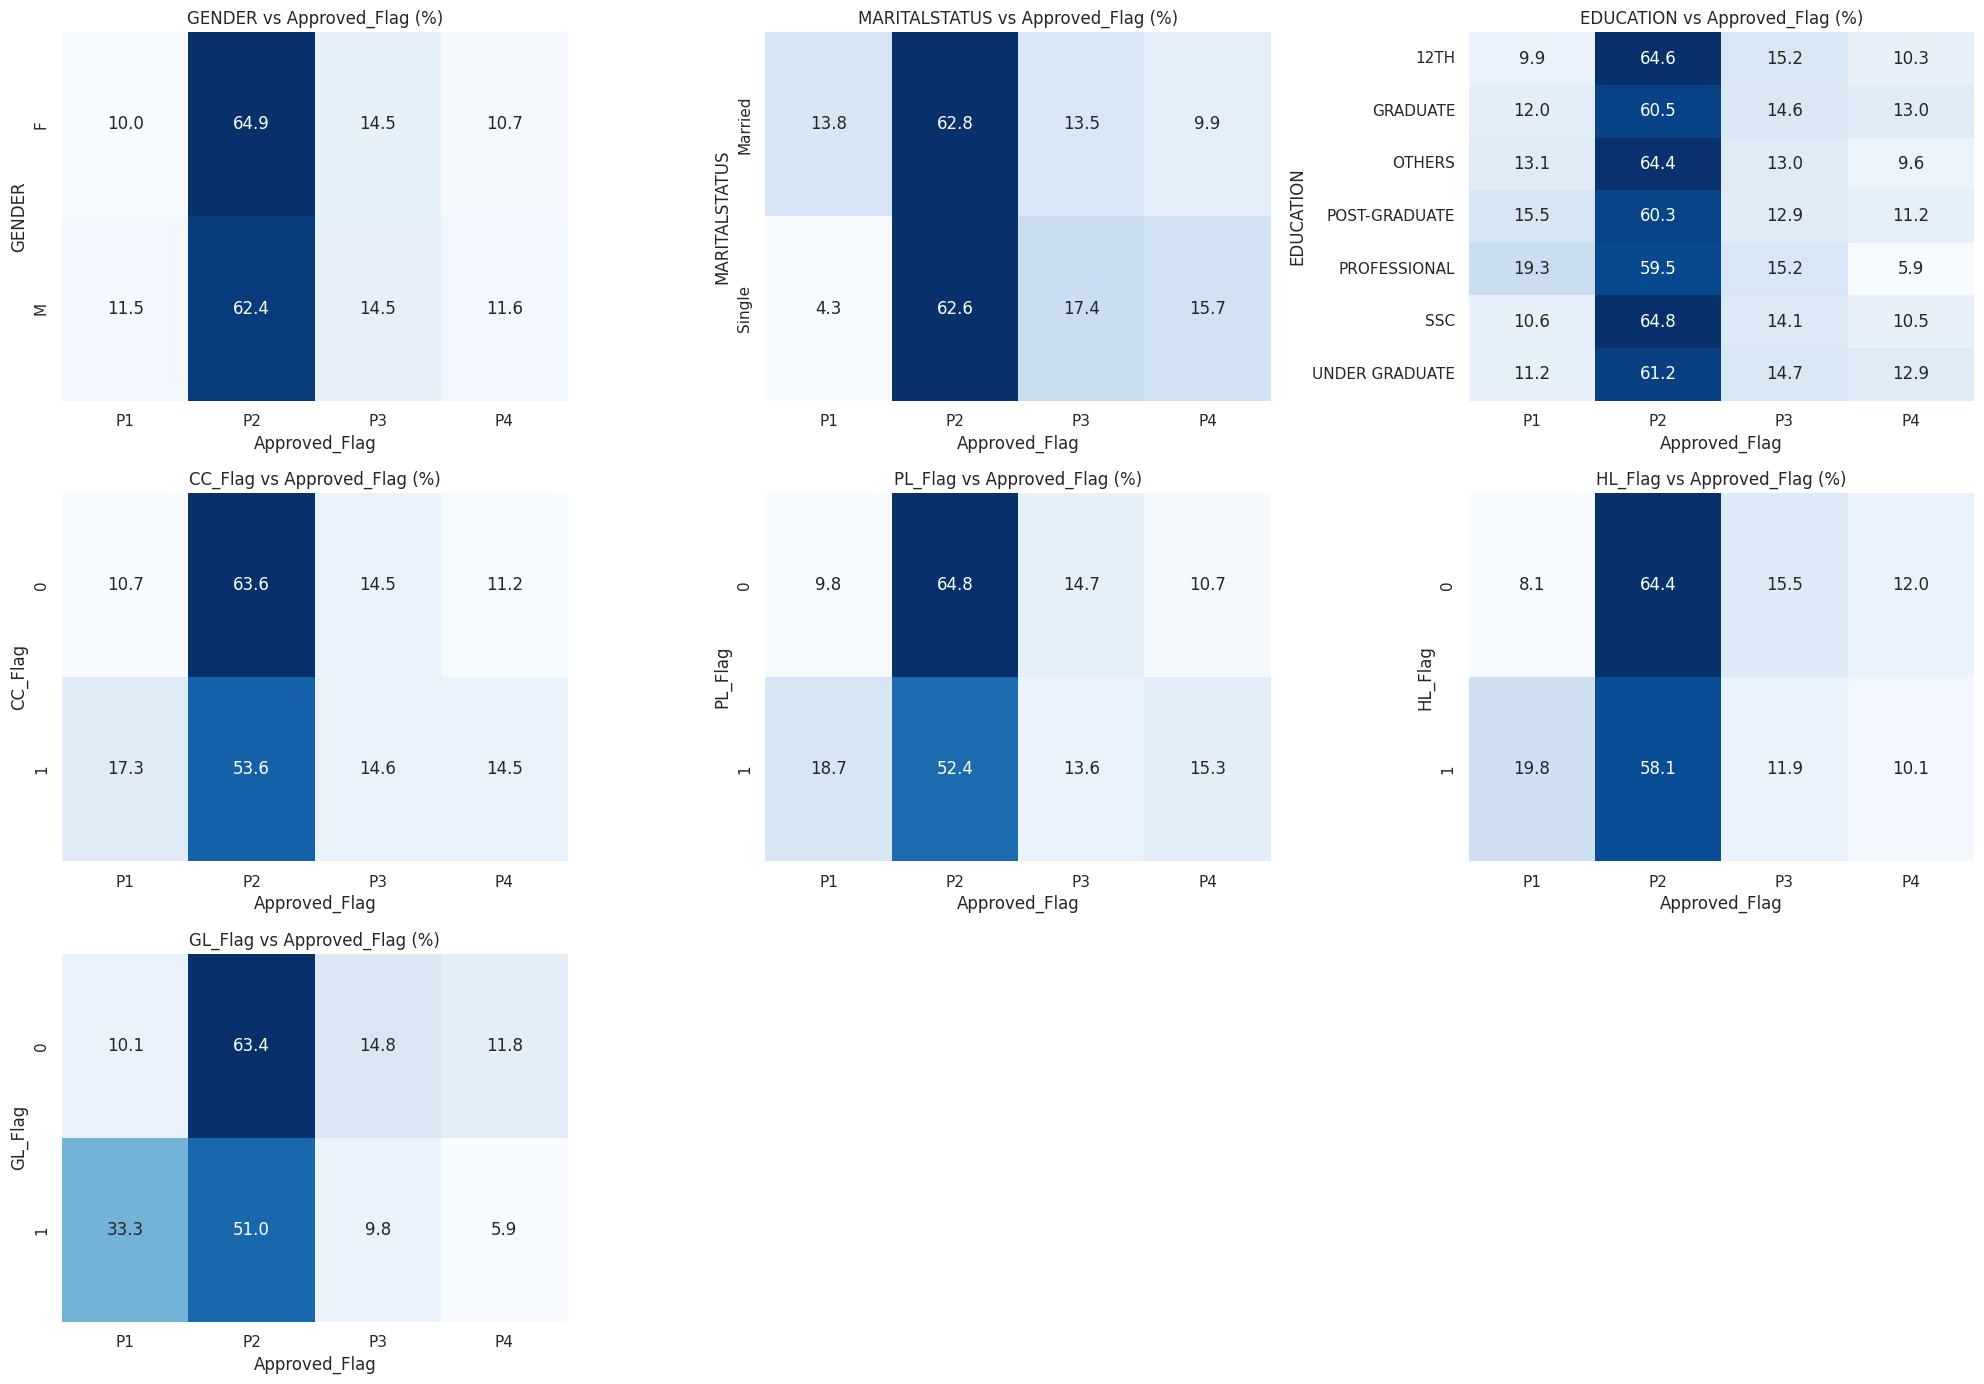

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

important_cat_cols = [
    'GENDER',
    'MARITALSTATUS',
    'EDUCATION',
    'CC_Flag',
    'PL_Flag',
    'HL_Flag',
    'GL_Flag'
]

n_plots = len(important_cat_cols)
cols = 3
rows = math.ceil(n_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(important_cat_cols):
    ct = pd.crosstab(
        df[col],
        df['Approved_Flag'],
        normalize='index'
    ) * 100

    sns.heatmap(
        ct,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        ax=axes[i],
        cbar=False
    )

    axes[i].set_title(f"{col} vs Approved_Flag (%)")
    axes[i].set_xlabel("Approved_Flag")
    axes[i].set_ylabel(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 3. Train Test Split

In [ ]:
target = 'Approved_Flag'

X = df.drop(columns=['PROSPECTID', target])
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
X_train.shape

(41068, 85)

In [ ]:
X_test.shape

(10268, 85)

# 4. Feature Engineering

**Optimal Order:**
1. **Handle missing values** → Clean foundation
2. **Handling categorical Features** → Make everything numerical  
3. **Handle outliers** → Prevent skewing later steps
4. **Transform features** (log, sqrt, etc.) → Fix skewness
5. **Scale features** → Final preparation for models

> Issues and Fixing


## Handling missing values

In [ ]:
(X_train.isna().mean() * 100)[lambda x: x > 0].sort_values(ascending=False)

CC_utilization                  92.889841
PL_utilization                  86.663582
max_delinquency_level           70.154378
time_since_recent_deliquency    70.154378
time_since_first_deliquency     70.154378
max_unsec_exposure_inPct        45.324827
max_deliq_6mts                  25.155839
max_deliq_12mts                 21.145417
PL_enq_L12m                     12.260154
PL_enq                          12.260154
PL_enq_L6m                      12.260154
CC_enq_L12m                     12.260154
tot_enq                         12.260154
CC_enq                          12.260154
CC_enq_L6m                      12.260154
enq_L3m                         12.260154
enq_L6m                         12.260154
enq_L12m                        12.260154
time_since_recent_enq           12.260154
time_since_recent_payment        8.451836
pct_currentBal_all_TL            0.129054
Age_Oldest_TL                    0.060875
Age_Newest_TL                    0.060875
dtype: float64

In [ ]:
drop_cols = ['CC_utilization', 'PL_utilization']

X_train = X_train.drop(columns=drop_cols)
X_test  = X_test.drop(columns=drop_cols)


In [ ]:
# 1. DROP columns with >85% missing (useless)
df = df.drop(['CC_utilization', 'PL_utilization'], axis=1)

In [ ]:
# 2. Handle 70% missing delinquency features
# Indicator: delinquency history
X_train['has_delinquency_history'] = (~X_train['time_since_recent_deliquency'].isna()).astype(int)
X_test['has_delinquency_history']  = (~X_test['time_since_recent_deliquency'].isna()).astype(int)

# Fill max delinquency level
X_train['max_delinquency_level'] = X_train['max_delinquency_level'].fillna(0)
X_test['max_delinquency_level']  = X_test['max_delinquency_level'].fillna(0)

In [ ]:
# Time-based: fill with large number (never delinquent)
max_months = max(
    X_train['time_since_recent_deliquency'].max(skipna=True),
    X_train['time_since_first_deliquency'].max(skipna=True)
)

X_train['time_since_recent_deliquency'] = X_train['time_since_recent_deliquency'].fillna(max_months + 1)
X_train['time_since_first_deliquency']  = X_train['time_since_first_deliquency'].fillna(max_months + 1)

X_test['time_since_recent_deliquency'] = X_test['time_since_recent_deliquency'].fillna(max_months + 1)
X_test['time_since_first_deliquency']  = X_test['time_since_first_deliquency'].fillna(max_months + 1)

**Delinquent** means **someone has failed to do something on time**, most commonly **missing or delaying a required payment**.


> Delinquency recency variables had high null values which were not missing at random but represented customers with no delinquency history.I encoded this explicitly using indicator variables and informative imputation rather than dropping the features



In [ ]:
# 3. Handle 20-50% missing with flags
cols_20_50 = ['max_unsec_exposure_inPct', 'max_deliq_6mts', 'max_deliq_12mts']

for col in cols_20_50:
    X_train[f'{col}_missing'] = X_train[col].isna().astype(int)
    X_test[f'{col}_missing']  = X_test[col].isna().astype(int)

    if 'deliq' in col:
        X_train[col] = X_train[col].fillna(0)
        X_test[col]  = X_test[col].fillna(0)
    else:
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        X_test[col]  = X_test[col].fillna(median_val)

For 3 columns with **20-50% missing data**, I'm doing **2 things for each**:

1. **Create a flag** → New column that marks "was this originally empty?" (1=yes, 0=no)

2. **Fill empty spots differently**:
   - **Delinquency columns** → Fill with **0** (means "no delinquency")
   - **Percentage column** → Fill with **median** (middle value)


In [ ]:
# 4. Creating an enquiry indicator (MOST IMPORTANT)
X_train['has_enquiry_history'] = (~X_train['tot_enq'].isna()).astype(int)
X_test['has_enquiry_history']  = (~X_test['tot_enq'].isna()).astype(int)

In [ ]:
# 5. Impute enquiry counts with 0 (LOGICALLY CORRECT)
enq_count_cols = [
    'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
    'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m',
    'enq_L3m', 'enq_L6m', 'enq_L12m',
    'tot_enq'
]

X_train[enq_count_cols] = X_train[enq_count_cols].fillna(0)
X_test[enq_count_cols]  = X_test[enq_count_cols].fillna(0)

In [ ]:
# Time Since Recent Enquiry (Informative Imputation)
max_enq_time = X_train['time_since_recent_enq'].max(skipna=True)

X_train['time_since_recent_enq'] = X_train['time_since_recent_enq'].fillna(max_enq_time + 1)
X_test['time_since_recent_enq']  = X_test['time_since_recent_enq'].fillna(max_enq_time + 1)

* "All enquiry columns count how many times lenders have checked this person's credit report for loan/credit card applications over different time periods and products."

In [ ]:
# 6. Handle remaining

# Payment history
X_train['has_payment_history'] = (~X_train['time_since_recent_payment'].isna()).astype(int)
X_test['has_payment_history']  = (~X_test['time_since_recent_payment'].isna()).astype(int)

max_pay_time = X_train['time_since_recent_payment'].max(skipna=True)

X_train['time_since_recent_payment'] = X_train['time_since_recent_payment'].fillna(max_pay_time + 1)
X_test['time_since_recent_payment']  = X_test['time_since_recent_payment'].fillna(max_pay_time + 1)

# pct_currentBal_all_TL
X_train['pct_currentBal_all_TL'] = X_train['pct_currentBal_all_TL'].fillna(0)
X_test['pct_currentBal_all_TL']  = X_test['pct_currentBal_all_TL'].fillna(0)

# Credit history age
X_train['has_credit_history'] = (~X_train['Age_Oldest_TL'].isna()).astype(int)
X_test['has_credit_history']  = (~X_test['Age_Oldest_TL'].isna()).astype(int)

X_train['Age_Oldest_TL'] = X_train['Age_Oldest_TL'].fillna(0)
X_train['Age_Newest_TL'] = X_train['Age_Newest_TL'].fillna(0)

X_test['Age_Oldest_TL'] = X_test['Age_Oldest_TL'].fillna(0)
X_test['Age_Newest_TL'] = X_test['Age_Newest_TL'].fillna(0)

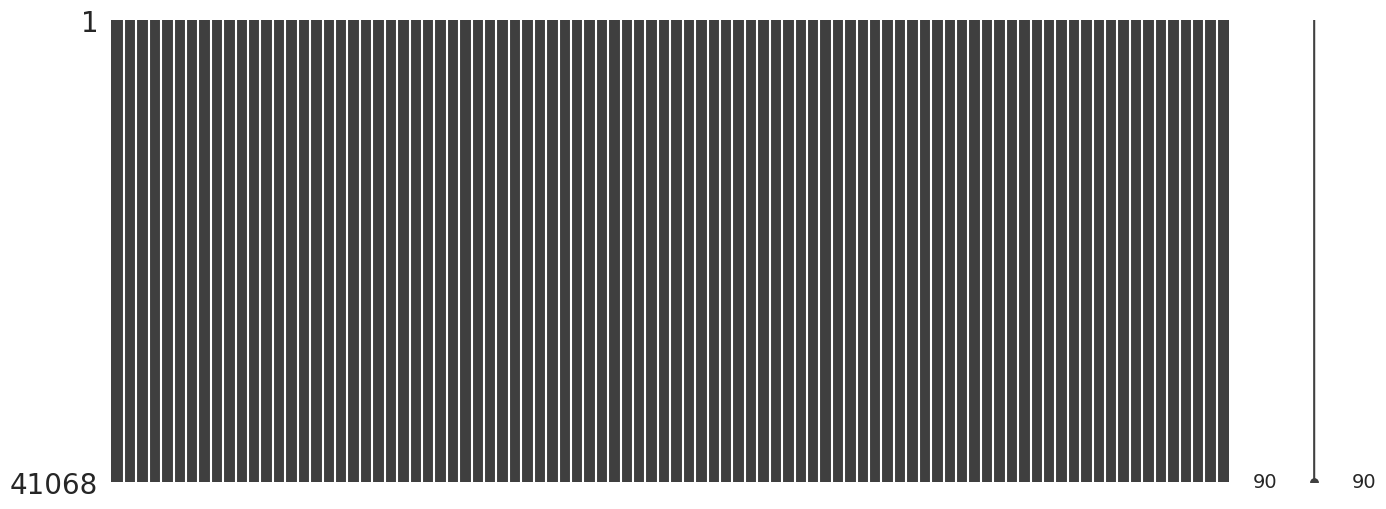

In [ ]:
import missingno as msno

msno.matrix(X_train, figsize=(16,6))
plt.show()

In [ ]:
X_train.isna().sum().sum()

np.int64(0)

* Now Our data have no missing values, DONE!!!

## Handling Categorical Features

In [ ]:
cat_cols = X_train.select_dtypes(include=['object']).columns

In [ ]:
cat_cols

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [ ]:
# Examine Each categoricals
for col in cat_cols:
    print(X_train[col].value_counts())
    print(f"Unique values: {X_train[col].nunique()}")
    print(f"\n")

MARITALSTATUS
Married    30226
Single     10842
Name: count, dtype: int64
Unique values: 2


EDUCATION
GRADUATE          13300
12TH              11552
SSC                7467
UNDER GRADUATE     4395
OTHERS             2343
POST-GRADUATE      1784
PROFESSIONAL        227
Name: count, dtype: int64
Unique values: 7


GENDER
M    36140
F     4928
Name: count, dtype: int64
Unique values: 2


last_prod_enq2
others          16688
ConsumerLoan    14254
PL               6381
CC               1839
AL               1201
HL                705
Name: count, dtype: int64
Unique values: 6


first_prod_enq2
others          22489
ConsumerLoan     9519
PL               3895
AL               2281
CC               1766
HL               1118
Name: count, dtype: int64
Unique values: 6




In [ ]:
# 1. for EDUCATION : use OrdinalEncoding for Ordinal (Has Natural Order)
edu_order = {
    'OTHERS': 0,
    'SSC': 1,
    '12TH': 2,
    'UNDER GRADUATE': 3,
    'GRADUATE': 4,
    'POST-GRADUATE': 5,
    'PROFESSIONAL': 6
}

X_train['EDUCATION'] = X_train['EDUCATION'].map(edu_order)
X_test['EDUCATION']  = X_test['EDUCATION'].map(edu_order)

In [ ]:
# 2. for GENDER: Simple Mapping
gender_map = {'M': 0, 'F': 1}

X_train['GENDER'] = X_train['GENDER'].map(gender_map)
X_test['GENDER']  = X_test['GENDER'].map(gender_map)

In [ ]:
# 3. MARITALSTATUS - Binary (Married=0, Single=1) OR One-Hot
# Since only 2 categories, simple mapping is sufficient
marital_map = {'Married': 0, 'Single': 1}

X_train['MARITALSTATUS'] = X_train['MARITALSTATUS'].map(marital_map)
X_test['MARITALSTATUS']  = X_test['MARITALSTATUS'].map(marital_map)

In [ ]:
# 4. Create One-Hot for last_prod_enq2, first_prod_enq2
onehot_cols = ['last_prod_enq2', 'first_prod_enq2']

X_train = pd.get_dummies(
    X_train,
    columns=onehot_cols,
    prefix=['last_prod', 'first_prod'],
    drop_first=True
)

X_test = pd.get_dummies(
    X_test,
    columns=onehot_cols,
    prefix=['last_prod', 'first_prod'],
    drop_first=True
)

# Align columns (VERY IMPORTANT)
X_train, X_test = X_train.align(
    X_test,
    join='left',
    axis=1,
    fill_value=0
)

In [ ]:
# 6. Most likely: P1 is best (lowest number), P4 is worst
# This is common in credit scoring
target_map = {'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3}

y_train = y_train.map(target_map)
y_test  = y_test.map(target_map)

In [ ]:
# Convert all bool columns to int in one line
bool_cols = X_train.select_dtypes(include=['bool']).columns

X_train[bool_cols] = X_train[bool_cols].astype('int8')
X_test[bool_cols]  = X_test[bool_cols].astype('int8')

In [ ]:
# Run this single command to check everything
cat_check = X_train.select_dtypes(include=['object', 'category', 'bool']).columns
print("Categorical encoding" + (" ✅ COMPLETE" if len(cat_check) == 0 else f" ❌ INCOMPLETE: {list(cat_check)}"))

Categorical encoding ✅ COMPLETE


## Outlier Detection and Handling

In [ ]:
pct_cols = [
    'pct_tl_open_L6M', 'pct_tl_closed_L6M',
    'pct_active_tl', 'pct_closed_tl',
    'pct_tl_open_L12M', 'pct_tl_closed_L12M',
    'pct_of_active_TLs_ever',
    'pct_opened_TLs_L6m_of_L12m',
    'pct_currentBal_all_TL',
    'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
    'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever',
    'max_unsec_exposure_inPct'
]

In [ ]:
total_count_cols = [
    'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
    'Total_TL_opened_L6M', 'Tot_TL_closed_L6M',
    'Total_TL_opened_L12M', 'Tot_TL_closed_L12M',
    'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
    'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL',
    'Other_TL', 'num_std', 'num_std_6mts', 'num_std_12mts'
]

In [ ]:
no_outlier_cols = (
    pct_cols +
    total_count_cols
)

In [ ]:
numeric_cols = [
    col for col in X_train.select_dtypes(include=[np.number]).columns
    if col not in no_outlier_cols
]
numeric_cols

['Tot_Missed_Pmnt',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'MARITALSTATUS',
 'EDUCATION',
 'AGE',
 'GENDER',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'Credit_Score',
 'has_delinquency_history',
 'max_unsec_exposure_inPct_missing',
 'max_deliq_6mts_missing',
 'max_deliq_12mts_missing',
 'has_enquiry_his

In [ ]:
numeric_cols = [
    'Tot_Missed_Pmnt',
    'Age_Oldest_TL', 'Age_Newest_TL',
    'time_since_recent_payment',
    'time_since_first_deliquency',
    'time_since_recent_deliquency',

    'num_times_delinquent',
    'max_delinquency_level',
    'max_recent_level_of_deliq',
    'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts',
    'max_deliq_6mts', 'max_deliq_12mts',
    'num_times_30p_dpd', 'num_times_60p_dpd',

    'num_sub', 'num_sub_6mts', 'num_sub_12mts',
    'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts',
    'num_lss', 'num_lss_6mts', 'num_lss_12mts',

    'recent_level_of_deliq',

    'tot_enq',
    'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m',
    'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
    'enq_L12m', 'enq_L6m', 'enq_L3m',

    'time_since_recent_enq',
    'AGE',
    'NETMONTHLYINCOME',
    'Time_With_Curr_Empr',
    'Credit_Score'
]


In [ ]:
numeric_cols

['Tot_Missed_Pmnt',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'time_since_recent_enq',
 'AGE',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'Credit_Score']

In [ ]:
# 1. Analyze skewness first
skew_X_train = pd.DataFrame({
    'column': numeric_cols,
    'skewness': [ X_train[col].skew() for col in numeric_cols]
})

print("Top skewed columns:")
print((skew_X_train.sort_values('skewness', ascending=False)).head(60))

Top skewed columns:
                          column    skewness
24                 num_lss_12mts  107.650937
23                  num_lss_6mts  100.670571
22                       num_lss   72.070323
20                  num_dbt_6mts   54.741625
17                  num_sub_6mts   50.304830
21                 num_dbt_12mts   46.842307
38              NETMONTHLYINCOME   46.317980
18                 num_sub_12mts   43.405286
19                       num_dbt   33.249525
12                max_deliq_6mts   23.208893
16                       num_sub   22.606207
13               max_deliq_12mts   15.327399
25         recent_level_of_deliq   12.780815
8      max_recent_level_of_deliq   11.202996
15             num_times_60p_dpd    8.751782
27                        CC_enq    8.247690
28                    CC_enq_L6m    7.817230
7          max_delinquency_level    7.659448
29                   CC_enq_L12m    7.302976
14             num_times_30p_dpd    7.093726
31                    PL_enq_L6m   

In [ ]:
outlier_bounds = {}

for col in numeric_cols:
    skew_val = X_train[col].skew()

    # METHOD 1: Near-normal
    if abs(skew_val) <= 0.5:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

    # METHOD 2: Right-skewed
    elif skew_val > 0.5:
        lower = X_train[col].quantile(0.01)
        upper = X_train[col].quantile(0.99)

    # METHOD 3: Left-skewed
    else:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 2.5 * IQR
        upper = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower, upper)


In [ ]:
for col, (lower, upper) in outlier_bounds.items():
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col]  = np.clip(X_test[col], lower, upper)

In [ ]:
for col in numeric_cols[:10]:
    lower, upper = outlier_bounds[col]
    pct_clipped = (
        ((X_train[col] == lower) | (X_train[col] == upper)).mean()
    )
    print(col, round(pct_clipped * 100, 2), "% clipped")

Tot_Missed_Pmnt 67.56 % clipped
Age_Oldest_TL 2.5 % clipped
Age_Newest_TL 4.72 % clipped
time_since_recent_payment 9.63 % clipped
time_since_first_deliquency 17.97 % clipped
time_since_recent_deliquency 0.0 % clipped
num_times_delinquent 71.24 % clipped
max_delinquency_level 71.16 % clipped
max_recent_level_of_deliq 71.27 % clipped
num_deliq_6mts 92.01 % clipped


In [ ]:
skew_after = pd.DataFrame({
    'column': numeric_cols,
    'skewness': [X_train[col].skew() for col in numeric_cols]
})

print(skew_after.sort_values('skewness', ascending=False).head(60))

                          column  skewness
16                       num_sub  8.657157
15             num_times_60p_dpd  5.326787
29                   CC_enq_L12m  4.605091
28                    CC_enq_L6m  4.518425
27                        CC_enq  4.445339
12                max_deliq_6mts  4.411911
14             num_times_30p_dpd  4.371813
9                 num_deliq_6mts  4.327022
7          max_delinquency_level  4.289015
8      max_recent_level_of_deliq  4.141908
11             num_deliq_6_12mts  4.119886
25         recent_level_of_deliq  3.867789
10               num_deliq_12mts  3.790536
13               max_deliq_12mts  3.569020
31                    PL_enq_L6m  3.351287
6           num_times_delinquent  3.284492
32                   PL_enq_L12m  3.173930
30                        PL_enq  2.852136
3      time_since_recent_payment  2.694274
2                  Age_Newest_TL  2.549929
34                       enq_L6m  2.509462
33                      enq_L12m  2.451297
35         

In [ ]:
X_train[['num_deliq_6mts', 'num_times_delinquent']].value_counts().head(10)

num_deliq_6mts  num_times_delinquent
0               0                       28811
                1                        2648
                2                        1492
                3                         954
1               1                         861
0               4                         684
                5                         460
                6                         348
                7                         312
1               2                         272
Name: count, dtype: int64

* **`num_deliq_6mts`** → “How many times did this person miss payments in the last 6 months?”
* **`num_times_delinquent`** → “How many times has this person *ever* missed payments?”

Now look at your result:

```
Most people: 0 missed payments
Some people: 1 missed payment
Fewer people: 2, 3, 4…
Very few people: 5, 6, 7+
```

That’s **normal real-life behavior**.





> Outlier Detection and Handling DONE!!!



## Feature Transformations (Not needed here)



In [ ]:
# # current skewness
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# skew_current = pd.DataFrame({
#     'column': numeric_cols,
#     'skewness': [df[col].skew() for col in numeric_cols],
#     'min_value': [df[col].min() for col in numeric_cols],
#     'max_value': [df[col].max() for col in numeric_cols],
#     'n_unique': [df[col].nunique() for col in numeric_cols]
# })

In [ ]:
# print("Current Skewness Analysis:")
# print((skew_current.sort_values('skewness', ascending=False)).head(40))

In [ ]:
# # Categorize columns
# skew_current['transform_type'] = 'none'
# skew_current.loc[skew_current['skewness'].abs() > 1, 'transform_type'] = 'consider'
# skew_current.loc[skew_current['skewness'].abs() > 2, 'transform_type'] = 'recommended'
# skew_current.loc[skew_current['skewness'].abs() > 3, 'transform_type'] = 'strongly_recommended'

# print(f"\nTransformation Categories:")
# print(skew_current['transform_type'].value_counts())


In [ ]:
# def apply_transformations(df):
#     transformation_log = []

#     for _, row in skew_current.iterrows():
#         col = row['column']
#         skew_val = row['skewness']

#         # Skip conditions
#         skip_conditions = [
#             col in ['PROSPECTID', 'Approved_Flag', 'MARITALSTATUS'],  # ID and target
#             df[col].nunique() <= 2,  # Binary columns
#             'flag' in col.lower() or 'missing' in col.lower(),  # Flag columns
#             abs(skew_val) < 1,  # Already near-normal
#             col in ['EDUCATION', 'GENDER', 'AGE', 'Credit_Score']  # Already encoded properly
#         ]

#         if any(skip_conditions):
#             continue

#         # Apply transformation based on skewness and data characteristics
#         if skew_val > 1:  # RIGHT-SKEWED (most common case)
#             if df[col].min() >= 0:  # Non-negative data
#                 # Log transform for right-skewed positive data
#                 original_skew = skew_val
#                 df[col] = np.log1p(df[col])
#                 new_skew = df[col].skew()
#                 transformation_log.append((col, 'log1p', original_skew, new_skew))
#             else:
#                 # Has negative values - use signed log
#                 original_skew = skew_val
#                 df[col] = np.sign(df[col]) * np.log1p(np.abs(df[col]))
#                 new_skew = df[col].skew()
#                 transformation_log.append((col, 'signed_log1p', original_skew, new_skew))

#         elif skew_val < -1:  # LEFT-SKEWED (rare)
#             # Square transform for left-skewed
#             original_skew = skew_val
#             df[col] = df[col] ** 2
#             new_skew = df[col].skew()
#             transformation_log.append((col, 'square', original_skew, new_skew))

#     return df, pd.DataFrame(transformation_log,
#                                        columns=['column', 'transform', 'skew_before', 'skew_after'])

# # Applying transformations
# df_transformed, transform_log = apply_transformations(df)

# print("\nTransformation Summary:")
# print(transform_log)
# print(f"\nTotal columns transformed: {len(transform_log)}")

In [ ]:
# # Check skewness after transformations
# skew_after = pd.DataFrame({
#     'column': df.select_dtypes(include=[np.number]).columns,
#     'skewness_after': [df[col].skew() for col in df.select_dtypes(include=[np.number]).columns]
# })

# # Compare before/after
# skew_comparison = skew_current.merge(skew_after, on='column', how='left')
# skew_comparison['improvement'] = skew_comparison['skewness'].abs() - skew_comparison['skewness_after'].abs()

# print("\nTop 10 Most Improved Columns:")
# print(skew_comparison.sort_values('improvement', ascending=False).head(10)[
#     ['column', 'skewness', 'skewness_after', 'improvement']
# ])

# print(f"\nSummary Statistics:")
# print(f"Average |skew| before: {skew_current['skewness'].abs().mean():.2f}")
# print(f"Average |skew| after:  {skew_after['skewness_after'].abs().mean():.2f}")
# print(f"Improvement: {(skew_current['skewness'].abs().mean() - skew_after['skewness_after'].abs().mean())/skew_current['skewness'].abs().mean()*100:.1f}%")

## Feature Scaling

In [ ]:
# Candidate numeric columns
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
num_cols

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_

In [ ]:
# Exclude columns that should NEVER be scaled
never_scale_cols = [
    # flags & binaries
    'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag',
    'has_delinquency_history', 'has_enquiry_history',
    'has_payment_history', 'has_credit_history',

    # one-hot encoded categoricals
    'last_prod_CC', 'last_prod_ConsumerLoan', 'last_prod_HL',
    'last_prod_PL', 'last_prod_others',
    'first_prod_CC', 'first_prod_ConsumerLoan',
    'first_prod_HL', 'first_prod_PL', 'first_prod_others',

    # ordinal encoded categoricals
    'MARITALSTATUS', 'EDUCATION', 'GENDER'
]

In [ ]:
# 3. Remove never-scale columns
candidate_scale_cols = [
    col for col in num_cols if col not in never_scale_cols
]

In [ ]:
# 4. Create summary statistics to inspect scale
scale_check = X_train[candidate_scale_cols].describe().T
scale_check['range'] = scale_check['max'] - scale_check['min']

In [ ]:
# 5. Sort by range (biggest magnitude difference first)
scale_check = scale_check.sort_values('range', ascending=False)
scale_check.head(60)

count          mean           std     min  \
max_unsec_exposure_inPct      41068.0     16.103507    649.221412     0.0   
NETMONTHLYINCOME              41068.0  26036.882780  12672.268451  8000.0   
pct_currentBal_all_TL         41068.0      0.902195     41.140307     0.0   
time_since_recent_payment     41068.0    741.850808   1678.638165    19.0   
time_since_recent_enq         41068.0    815.200083   1541.355060     1.0   
num_std                       41068.0      9.104997     21.109553     0.0   
Time_With_Curr_Empr           41068.0    110.059657     72.637929    15.0   
max_delinquency_level         41068.0     19.367981     51.060646     0.0   
Gold_TL                       41068.0      1.545437      5.386673     0.0   
Secured_TL                    41068.0      2.821029      6.196360     0.0   
Total_TL                      41068.0      4.828187      7.183735     1.0   
Tot_Closed_TL                 41068.0      2.750852      5.944788     0.0   
max_recent_level_of_deliq     41068.0     10.941536     27.061753     0.0   
Age_Oldest_TL                 41068.0     44.970342     40.471669     2.0   
recent_level_of_deliq         41068.0      9.075850     21.627415     0.0   
num_std_12mts                 41068.0      3.287134      7.451636     0.0   
Age_Newest_TL                 41068.0     15.462112     19.796022     1.0   
max_deliq_12mts               41068.0      5.608308     16.483580     0.0   
Credit_Score                  41068.0    679.838427     18.229144   637.5   
Other_TL                      41068.0      1.082303      2.416551     0.0   
max_deliq_6mts                41068.0      2.573065      9.831155     0.0   
num_std_6mts                  41068.0      1.468126      3.332958     0.0   
Unsecured_TL                  41068.0      2.007159      3.191419     0.0   
Tot_Active_TL                 41068.0      2.077335      2.288165     0.0   
Consumer_TL                   41068.0      1.135166      2.226528     0.0   
Tot_TL_closed_L12M            41068.0      0.734684      1.455429     0.0   
Total_TL_opened_L12M          41068.0      1.497078      2.121338     0.0   
AGE                           41068.0     33.747906      8.745325    21.0   
time_since_recent_deliquency  41068.0     29.035940     11.864998     0.0   
tot_enq                       41068.0      4.519066      5.263528     0.0   
Auto_TL                       41068.0      0.591945      0.898206     0.0   
CC_TL                         41068.0      0.123989      0.508209     0.0   
Total_TL_opened_L6M           41068.0      0.733759      1.298479     0.0   
PL_TL                         41068.0      0.278976      0.848220     0.0   
num_times_delinquent          41068.0      1.480423      3.553964     0.0   
Tot_TL_closed_L6M             41068.0      0.427535      0.988050     0.0   
enq_L12m                      41068.0      2.555761      3.510568     0.0   
num_times_30p_dpd             41068.0      0.654597      2.184244     0.0   
enq_L6m                       41068.0      1.689271      2.550409     0.0   
num_times_60p_dpd             41068.0      0.364761      1.536909     0.0   
time_since_first_deliquency   41068.0     33.598617      4.172390    25.5   
Home_TL                       41068.0      0.070371      0.344528     0.0   
PL_enq                        41068.0      0.939369      1.821075     0.0   
enq_L3m                       41068.0      1.048359      1.680366     0.0   
CC_enq                        41068.0      0.367756      1.188626     0.0   
PL_enq_L12m                   41068.0      0.625962      1.354491     0.0   
num_deliq_12mts               41068.0      0.452445      1.342380     0.0   
num_deliq_6_12mts             41068.0      0.283481      0.949548     0.0   
PL_enq_L6m                    41068.0      0.413875      1.020003     0.0   
CC_enq_L12m                   41068.0      0.204612      0.739298     0.0   
Tot_Missed_Pmnt               41068.0      0.527028      0.933713     0.0   
num_deliq_6mts              

In [ ]:
scale_cols = [
    'NETMONTHLYINCOME',
    'AGE',
    'Time_With_Curr_Empr',
    'Age_Oldest_TL',
    'Age_Newest_TL',
    'time_since_recent_payment',
    'time_since_recent_enq',
    'time_since_first_deliquency',
    'time_since_recent_deliquency'
]


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols]  = scaler.transform(X_test[scale_cols])

In [ ]:
X_train[scale_cols].describe()

NETMONTHLYINCOME           AGE  Time_With_Curr_Empr  Age_Oldest_TL  \
count      41068.000000  41068.000000         41068.000000   41068.000000   
mean           0.213949      0.145659             0.229424       0.239407   
std            1.056022      0.728777             1.037685       0.809433   
min           -1.289125     -0.916667            -1.128571      -0.620000   
25%           -0.455792     -0.416667            -0.471429      -0.380000   
50%            0.000000      0.000000             0.000000       0.000000   
75%            0.544208      0.583333             0.528571       0.620000   
max            4.710875      2.166667             3.928571       3.000000   

       Age_Newest_TL  time_since_recent_payment  time_since_recent_enq  \
count   41068.000000               41068.000000           41068.000000   
mean        0.533008                   2.251193               1.367629   
std         1.414002                   5.709654               3.014875   
min        -0.500000                  -0.207483              -0.224939   
25%        -0.285714                  -0.088435              -0.203423   
50%         0.000000                   0.000000               0.000000   
75%         0.714286                   0.911565               0.796577   
max         7.142857                  20.360544               9.101222   

       time_since_first_deliquency  time_since_recent_deliquency  
count                 41068.000000                  41068.000000  
mean                     -0.800461                     -0.580338  
std                       1.390797                      0.988750  
min                      -3.500000                     -3.000000  
25%                      -1.000000                     -1.000000  
50%                       0.000000                      0.000000  
75%                       0.000000                      0.000000  
max                       0.000000                      0.000000

* I used RobustScaler to scale only continuous variables so that the median customer is centered at zero while preserving skew and extreme behavior.

## What scaling is trying to do ?

Scaling tries to answer:

> “How big is this value compared to most people?”

There are **two common ways** to define “most people”:

1. **Average-based** (StandardScaler)
2. **Median-based** (RobustScaler)

---

## 🔹 StandardScaler (mean & standard deviation)

**How it works**

```text
value − average
----------------
 standard deviation
```

**What it assumes**

* Data is roughly symmetric (bell-shaped)
* No extreme values

**What happens if this assumption is false**

* A few extreme values pull the average
* The scale becomes misleading
* Most people get squashed into a narrow range

---

## 🔹 RobustScaler (median & IQR)

**How it works**

```text
value − median
----------------
   IQR (middle 50%)
```

**What it assumes**

* Data may be skewed
* Extreme values exist

**What it ignores**

* Very large or very small outliers

---

## 🧠 Why My data needs RobustScaler?

Let’s look at your features:

### 1️⃣ NETMONTHLYINCOME

* Most people earn “normal” amounts
* Some earn **very high** income

➡ Mean is pulled up
➡ StandardScaler thinks most people are “below average”
➡ Bad scaling

RobustScaler:

* Looks at the **middle 50%**
* High earners don’t distort scale

---

### 2️⃣ Time & Age variables

```
time_since_recent_payment
Age_Oldest_TL
Time_With_Curr_Empr
```

These:

* Have long tails
* Are not symmetric
* Have natural minimums (0)

RobustScaler handles this naturally.

---

### 3️⃣ Even after outlier handling…

Important point:

> **Capping ≠ symmetry**

Your distributions are still skewed (as we saw).

So StandardScaler still suffers.


## Why NOT StandardScaler here?

| Reason                 | Impact                    |
| ---------------------- | ------------------------- |
| Sensitive to outliers  | Scale distorted           |
| Assumes normality      | False for credit data     |
| Mean pulled by tail    | Bad coefficient stability |
| Worse interpretability | Regulatory risk           |

## ✅ When StandardScaler *is* OK

StandardScaler is fine when:

* Data is already symmetric
* No heavy tails
* Examples: sensor data, lab measurements

**Credit data is NOT like that.**

---

> **If data is skewed → RobustScaler
> If data is symmetric → StandardScaler**

For My data is:

* skewed
* heavy-tailed
* real-world financial behavior

👉 **RobustScaler is the correct choice.**


# 4. Model Training and Evaluation

In [ ]:
X_train.columns


Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts',

In [ ]:
X_train = X_train.drop(columns=['Credit_Score'])
X_test = X_test.drop(columns=['Credit_Score'])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, sample_weight=None):
    print(f"\n{'='*60}")
    print(f"MODEL: {model_name}")
    print(f"{'='*60}")

    if sample_weight is not None:
        model.fit(X_train, y_train, sample_weight=sample_weight)
    else:
        model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dt_acc = evaluate_model(
    dt_model,
    X_train, y_train,
    X_test, y_test,
    "Decision Tree"
)


MODEL: Decision Tree
Train Accuracy: 0.7842
Test Accuracy : 0.7719

Confusion Matrix:
[[ 822  335    3    1]
 [ 222 5913  265   40]
 [  34  843  410  204]
 [   1  146  248  781]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1161
           1       0.82      0.92      0.86      6440
           2       0.44      0.27      0.34      1491
           3       0.76      0.66      0.71      1176

    accuracy                           0.77     10268
   macro avg       0.70      0.64      0.66     10268
weighted avg       0.75      0.77      0.76     10268



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    n_jobs=-1,
    random_state=42
)

rf_acc = evaluate_model(
    rf_model,
    X_train, y_train,
    X_test, y_test,
    "Random Forest"
)


MODEL: Random Forest
Train Accuracy: 0.7818
Test Accuracy : 0.7636

Confusion Matrix:
[[ 596  565    0    0]
 [  77 6243   55   65]
 [  19 1050  172  250]
 [   1  244  101  830]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.51      0.64      1161
           1       0.77      0.97      0.86      6440
           2       0.52      0.12      0.19      1491
           3       0.72      0.71      0.72      1176

    accuracy                           0.76     10268
   macro avg       0.72      0.58      0.60     10268
weighted avg       0.74      0.76      0.72     10268



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    n_jobs=-1
)

lr_acc = evaluate_model(
    lr_model,
    X_train, y_train,
    X_test, y_test,
    "Logistic Regression"
)



MODEL: Logistic Regression
Train Accuracy: 0.7593
Test Accuracy : 0.7573

Confusion Matrix:
[[ 747  411    1    2]
 [ 180 6041  127   92]
 [  34 1022  271  164]
 [   1  239  219  717]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1161
           1       0.78      0.94      0.85      6440
           2       0.44      0.18      0.26      1491
           3       0.74      0.61      0.67      1176

    accuracy                           0.76     10268
   macro avg       0.68      0.59      0.62     10268
weighted avg       0.73      0.76      0.73     10268



In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb_acc = evaluate_model(
    xgb_model,
    X_train, y_train,
    X_test, y_test,
    "XGBoost"
)


MODEL: XGBoost
Train Accuracy: 0.8435
Test Accuracy : 0.8033

Confusion Matrix:
[[ 909  250    0    2]
 [ 166 6016  232   26]
 [  38  805  434  214]
 [   1   63  223  889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1161
           1       0.84      0.93      0.89      6440
           2       0.49      0.29      0.36      1491
           3       0.79      0.76      0.77      1176

    accuracy                           0.80     10268
   macro avg       0.73      0.69      0.71     10268
weighted avg       0.78      0.80      0.79     10268



Lets try GridSearchCV

In [ ]:
# from sklearn.metrics import recall_score, make_scorer
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.utils.class_weight import compute_sample_weight
# from scipy.stats import randint

# # 1. Define scorer (Class-2 Recall)
# recall_class2 = make_scorer(
#     recall_score,
#     labels=[2],
#     average='macro'
# )

# # 2. Sample weights (business-driven)
# class_weight = {0:1, 1:1, 2:5, 3:3}

# sample_weights = compute_sample_weight(
#     class_weight=class_weight,
#     y=y_train
# )

# # 3. Base model
# xgb = XGBClassifier(
#     objective='multi:softprob',
#     num_class=4,
#     eval_metric='mlogloss',
#     n_estimators=300,
#     random_state=42,
#     n_jobs=-1
# )

# # 4. Parameter distributions (instead of grid)
# param_dist = {
#     "max_depth": randint(4, 7),          # [4,5,6]
#     "min_child_weight": randint(3, 8),   # [3..7]
#     "subsample": [0.7, 0.8],
#     "colsample_bytree": [0.7, 0.8]
# }

# # 5. Randomized Search
# rand_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=15,                 # 🔥 15 instead of 36*3 fits
#     scoring=recall_class2,
#     cv=3,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # 6. Fit
# rand_search.fit(
#     X_train,
#     y_train,
#     sample_weight=sample_weights
# )

# rand_search.best_params_


{'colsample_bytree': 0.7, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7} -> From Grid Search CV

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight={0:1, 1:1, 2:5, 3:3},
    y=y_train
)

xgb_weighted = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    min_child_weight= 4
)

xgb_weighted.fit(
    X_train,
    y_train,
    sample_weight=sample_weights
)

y_test_pred = xgb_weighted.predict(X_test)

evaluate_model(
    xgb_weighted,
    X_train, y_train,
    X_test, y_test,
    "XGBoost (Weighted)",
    sample_weight=sample_weights
)


MODEL: XGBoost (Weighted)
Train Accuracy: 0.7782
Test Accuracy : 0.7452

Confusion Matrix:
[[ 881  272    8    0]
 [ 158 4858 1410   14]
 [  35  195 1136  125]
 [   0    5  394  777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1161
           1       0.91      0.75      0.83      6440
           2       0.39      0.76      0.51      1491
           3       0.85      0.66      0.74      1176

    accuracy                           0.75     10268
   macro avg       0.74      0.73      0.72     10268
weighted avg       0.82      0.75      0.77     10268



| Priority | What to improve Further        | Gain             |
| -------- | ----------------------- | ---------------- |
| 1️⃣      | Probability threshold   | +5–8% recall     |
| 2️⃣      | Cost-based selection    | Better decisions |
| 3️⃣      | Weight + threshold loop | +3–5% F1         |
| 4️⃣      | Feature sanity pass     | +2–3% recall     |
| 5️⃣      | Cross-fold stability    | Production-ready |


# 5. Performance Analysis

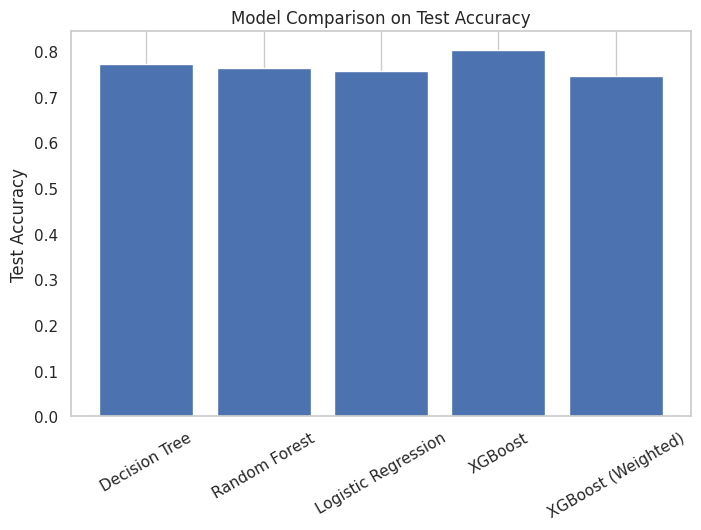

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_performance = pd.DataFrame({
    "Model": [
        "Decision Tree",
        "Random Forest",
        "Logistic Regression",
        "XGBoost",
        "XGBoost (Weighted)"
    ],
    "Test Accuracy": [
        0.7719,
        0.7636,
        0.7573,
        0.8033,
        0.7452
    ]
})

plt.figure(figsize=(8,5))
plt.bar(model_performance["Model"], model_performance["Test Accuracy"])
plt.xticks(rotation=30)
plt.ylabel("Test Accuracy")
plt.title("Model Comparison on Test Accuracy")
plt.grid(axis='y')
plt.show()


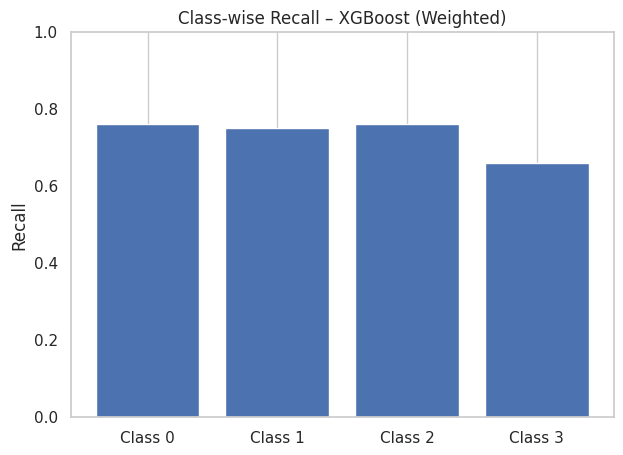

In [ ]:
import numpy as np

classes = ["Class 0", "Class 1", "Class 2", "Class 3"]
recall_values = [0.76, 0.75, 0.76, 0.66]

plt.figure(figsize=(7,5))
plt.bar(classes, recall_values)
plt.ylabel("Recall")
plt.title("Class-wise Recall – XGBoost (Weighted)")
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


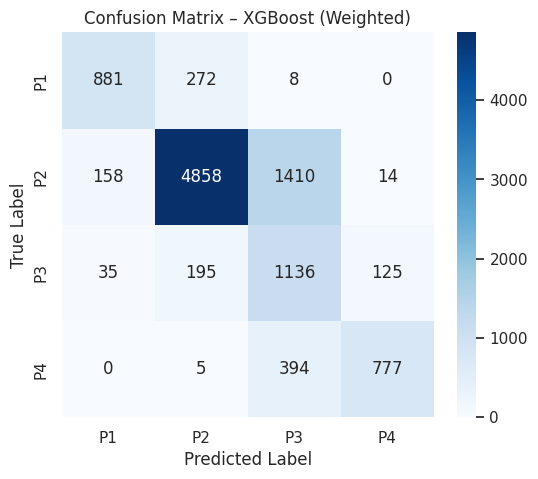

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["P1","P2","P3","P4"],
    yticklabels=["P1","P2","P3","P4"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – XGBoost (Weighted)")
plt.show()


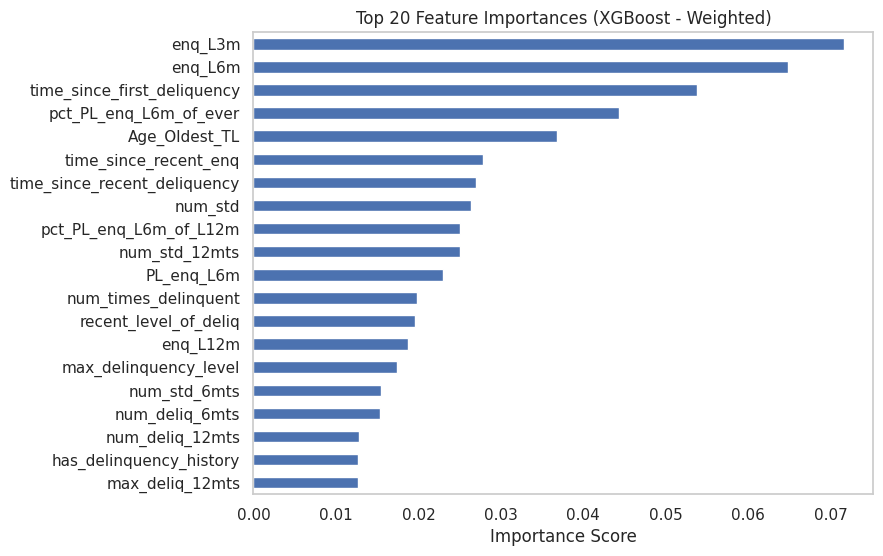

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance
feat_importance = pd.Series(
    xgb_weighted.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Top 20 features
top_features = feat_importance.head(20)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances (XGBoost - Weighted)")
plt.grid()
plt.show()


In [ ]:
top_features_df = top_features.reset_index()
top_features_df.columns = ["Feature", "Importance"]
top_features_df


Feature  Importance
0                        enq_L3m    0.071593
1                        enq_L6m    0.064851
2    time_since_first_deliquency    0.053806
3         pct_PL_enq_L6m_of_ever    0.044354
4                  Age_Oldest_TL    0.036849
5          time_since_recent_enq    0.027810
6   time_since_recent_deliquency    0.027019
7                        num_std    0.026378
8         pct_PL_enq_L6m_of_L12m    0.025103
9                  num_std_12mts    0.025070
10                    PL_enq_L6m    0.022964
11          num_times_delinquent    0.019883
12         recent_level_of_deliq    0.019606
13                      enq_L12m    0.018748
14         max_delinquency_level    0.017385
15                  num_std_6mts    0.015407
16                num_deliq_6mts    0.015324
17               num_deliq_12mts    0.012784
18       has_delinquency_history    0.012705
19               max_deliq_12mts    0.012641

# 7. Debugging (i observed below mistakes and went back again and did feature engineering for my problem)


# 📌 Credit Risk Modeling – Mistakes & Fixes (Post-Diagnosis Notes)

This document summarizes the **issues identified during model diagnostics**,  
why they happened, and the **correct modeling decisions** taken.

---

## ❌ Mistake 1: Using `Credit_Score` as a Regular Feature

### 🔍 Evidence
- Test Accuracy **WITH Credit_Score**: **99.53%**
- Test Accuracy **WITHOUT Credit_Score**: **~78–80%**
- Feature importance:
  - `Credit_Score` ≈ **88%**
  - All other features individually < **0.5%**
- Credit Score ranges almost **directly map to classes**:

| Class | Credit Score Range |
|-----|--------------------|
| P1 | 701 – 722 |
| P2 | 669 – 700 |
| P3 | 638 – 722 |
| P4 | 638 – 658 |

---

### 🚨 Why This Is a Problem
- `Credit_Score` is a **summary variable** already encoding:
  - Delinquency
  - Utilization
  - Enquiries
  - Credit history
- `Approved_Flag` is **likely derived using Credit_Score thresholds**
- Model learns **policy rules**, not **customer behavior**

⚠️ This is **proxy target leakage** (conceptual leakage, not coding leakage)

---

### ✅ Correct Solution
- **Remove `Credit_Score`** when building a *behavioral risk model*
- Or use **two-stage modeling**:
  1. Predict `Credit_Score` from raw behavior
  2. Predict approval using score + policy rules
- If required:
  - Bucket `Credit_Score`
  - Or constrain monotonicity
  - Or use it only for benchmarking

---

## ❌ Mistake 2: Trusting Accuracy Alone

### 🔍 Evidence
- Accuracy ≈ **99.5%**
- Majority class baseline ≈ **62.7%**
- Macro F1 initially ignored
- Minority class (P3) not evaluated independently

---

### 🚨 Why This Is a Problem
- Credit datasets are **imbalanced**
- Accuracy hides:
  - Poor minority class recall
  - Risk misclassification
- Regulators & businesses care about:
  - Recall
  - Precision
  - Class-wise performance

---

### ✅ Correct Solution
- Always report:
  - Confusion matrix
  - Macro F1
  - Class-wise precision & recall
- After removing `Credit_Score`:
  - Accuracy ≈ **80%**
  - Macro F1 ≈ **0.71**
  - This is **realistic and trustworthy**

---

## ❌ Mistake 3: Ignoring Class Ordering (Ordinal Nature)

### 🔍 Evidence
Classes are naturally ordered:

But model treated them as **nominal classes**.

---

### 🚨 Why This Is a Problem
- Predicting P1 → P4 is worse than P1 → P2
- Standard multiclass loss treats both equally
- Credit risk is **ordinal**, not categorical

---

### ✅ Correct Solution
- Use:
  - Ordinal classification
  - Or staged modeling:
    - Good vs Bad
    - Then refine middle classes
- Penalize **distance-based misclassification**

---

## ❌ Mistake 4: Over-reliance on XGBoost Performance

### 🔍 Evidence
- XGBoost accuracy: **99.5%**
- Random Forest accuracy: **~84%**
- Logistic Regression: much lower

---

### 🚨 Why This Is a Problem
- XGBoost exploits **sharp threshold splits**
- Credit decisions often follow hard rules
- High gap vs simpler models signals:
  - Policy learning
  - Feature dominance

---

### ✅ Correct Solution
- Always compare with:
  - Logistic Regression
  - Random Forest
- If XGBoost >> others:
  - Investigate feature dominance
  - Check for proxy leakage

---

## ❌ Mistake 5: Highly Correlated Redundant Features

### 🔍 Evidence
Correlation > 0.95 found:
- `pct_active_tl` ↔ `pct_closed_tl`
- `pct_active_tl` ↔ `pct_of_active_TLs_ever`
- `num_std_6mts` ↔ `num_std_12mts`

---

### 🚨 Why This Is a Problem
- Redundant features:
  - Inflate importance
  - Reduce interpretability
  - Increase instability

---

### ✅ Correct Solution
- Drop or consolidate correlated features
- Keep **one representative feature**
- Improves explainability & robustness

---

## ✅ What Was Done Correctly (No Fix Needed)

✔ Train–test split was properly **stratified**  
✔ Data was **shuffled**  
✔ No ID / target leakage  
✔ Preprocessing fit only on training data  
✔ Cross-validation scores stable (std ≈ 0.0007)  
✔ Overfitting gap < 0.5%  

---

## 🧠 Final Takeaway

> ❗ The original 99.5% model was **policy replication**  
> ✅ The ~80% model is **true behavioral credit risk modeling**

In credit risk:
- **Lower accuracy + higher realism = better model**
- Explainability & stability matter more than perfection

---

## 📌 Recommended Final Modeling Strategy

1. Remove `Credit_Score` for behavioral modeling
2. Use class-wise metrics, not accuracy
3. Treat classes as **ordinal**
4. Compare with simple baselines
5. Use SHAP for explainability
6. Accept ~75–85% accuracy as **healthy**

---

📎 *These notes are suitable for audits, interviews, and production justification.*


So, **Problem - 1:** I observed unrealistically high accuracy and diagnosed target leakage by inspecting feature distributions grouped by the label. Credit score showed near-perfect separability across classes, indicating the label was derived using it.

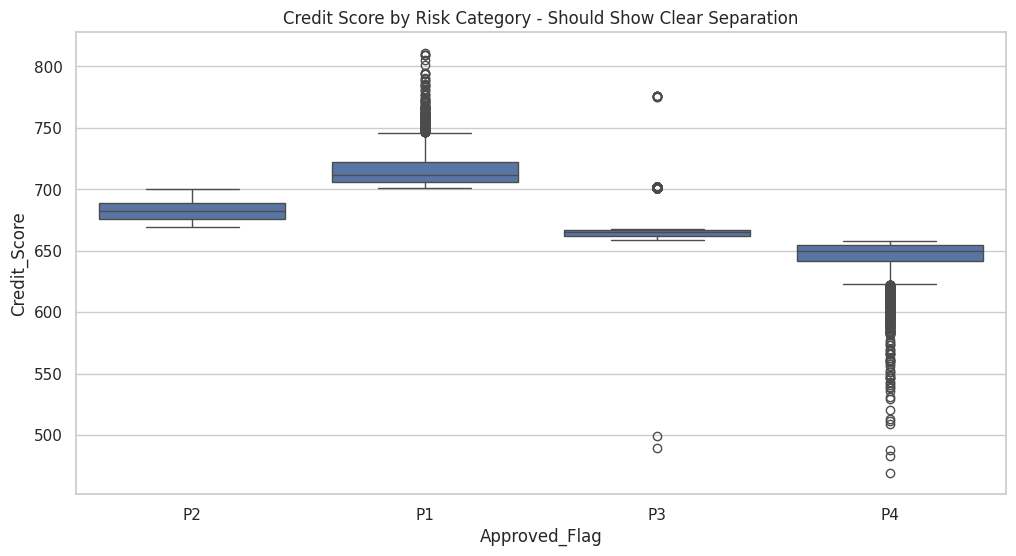

In [ ]:
# Visualize
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Approved_Flag', y='Credit_Score', data=df)
plt.title('Credit Score by Risk Category - Should Show Clear Separation')
plt.show()

So, **Problem - 2:**
Your model got **99.5% accuracy because it was “cheating”** — you gave it **Credit_Score**, which already decides loan approval. So instead of learning patterns, it was **reading the answer** (target leakage).

> There exists at least one Credit_Score value (or range) that appears ONLY in class 1 and NEVER in classes 0, 2, or 3.




In [ ]:
# Step - 5: Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("Feature importance distribution:\n")

# Print top 5 features
print("Top 5 features:")
for i in range(5):
    print(f"{i+1}. {feature_importance.loc[i, 'feature']} "
          f"({feature_importance.loc[i, 'importance']:.4f})")

print("\nSummary:")
print(f"Top feature importance: {feature_importance.loc[0, 'importance']:.4f}")
print(f"Sum of top 5: {feature_importance.loc[:4, 'importance'].sum():.4f}")
print(f"Sum of all others: {feature_importance.loc[5:, 'importance'].sum():.4f}")

# Red flag check
if feature_importance.loc[0, 'importance'] > 0.5:
    print(f"\n🚨 RED FLAG: {feature_importance.loc[0, 'feature']} "
          f"has {feature_importance.loc[0, 'importance']:.1%} of total importance!")


Feature importance distribution:

Top 5 features:
1. Credit_Score (0.8635)
2. num_deliq_12mts (0.0038)
3. first_prod_PL (0.0033)
4. first_prod_others (0.0033)
5. enq_L3m (0.0031)

Summary:
Top feature importance: 0.8635
Sum of top 5: 0.8770
Sum of all others: 0.1230

🚨 RED FLAG: Credit_Score has 86.3% of total importance!


So, **Problem:** “The model exhibited severe target leakage, evidenced by Credit_Score accounting for 86% of total feature importance, leading to unrealistically high accuracy.”



 > So Let's Fix these



How to Read Statistical Test Results (Layman + ML Way)

---

* 1.**F-Statistic (ANOVA)**

What it *really* means

> “How different are the groups compared to how noisy the data is?”

Think of it like this:

* You have **4 groups (P1–P4)**
* Each group has ups and downs (noise)
* F-stat checks:
  👉 *Are the group averages far apart compared to the noise inside each group?*

How to read it

* **High F-value** → groups are clearly different
* **Low F-value** → groups look similar

In simple ML words

> “This feature separates classes well.”

---

* 2. **p-Value**

What it *really* means

> “Could this difference have happened just by luck?”

Think of it like this:

* If there was **actually no relationship**
* What’s the chance you’d still see this much separation?

How to read it

* **p ≈ 0** → almost impossible by chance
* **p < 0.05** → statistically meaningful
* **p > 0.05** → likely noise

In simple ML words

> “This feature truly matters, not random.”

---

 Together (F + p-value)

| Scenario        | Meaning                    |
| --------------- | -------------------------- |
| High F + low p  | 🚀 Strong, useful feature  |
| Low F + high p  | ❌ Weak, noisy feature      |
| High F + high p | ⚠️ Unstable / needs data   |
| Low F + low p   | ⚠️ Tiny effect, not useful |

---

OTHER COMMON STAT TESTS (Future-Proof)

---

**Chi-Square Test (Categorical Features)**

What it means

> “Are these two categories related?”

Example

* Gender vs Approved_Flag
* Product type vs Risk class

How to read

* **Low p-value** → categories are related
* **High p-value** → no relationship

Layman line:

> “These categories influence approval.”

---

4️⃣ **Correlation Coefficient (Pearson / Spearman)**

What it means

> “Do two features move together?”

Think of it as:

* +1 → move together
* 0 → unrelated
* −1 → move opposite

Layman line:

> “These features tell similar stories.”

⚠️ High correlation ≠ causation

---

5️⃣ **Confidence Interval**

 What it means

> “How sure are we about this number?”

Example

Accuracy = 78% ± 2%

### Layman line:

> “True performance is likely between 76–80%.”

---

**t-Test (Two Groups Only)**

What it means

> “Are these two groups really different?”

Example

Approved vs Rejected income

Layman line:

> “The average income difference is real.”

---

One Universal Rule (MEMORIZE)

> **Statistic = strength of effect**
> **p-value = confidence it’s real**

---